# Credit Score Classification

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
#import test and training data
traindata=pd.read_csv(r'E:\LearningPython\Neural Networks\Credit Score\Dataset\archive\train.csv', low_memory=False)
testdata=pd.read_csv(r'E:\LearningPython\Neural Networks\Credit Score\Dataset\archive\test.csv', low_memory=False)

In [119]:
pd.set_option('display.max_columns', 35)

In [120]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Data Study

In [122]:
traindata.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [123]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

##### Change type to category

In [124]:
catcols=['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_Score', 'Payment_Behaviour', 'Payment_of_Min_Amount']
traindata[catcols]=traindata[catcols].astype('category')

# Data Cleaning

In [125]:
traindata.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [126]:
traindata.duplicated().sum()

0

In [127]:
traindata.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

#### Drop redundant columns


In [128]:
traindata=traindata.drop(['ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)


##### Handle categorical columns

In [129]:
cl=list(traindata.select_dtypes('category').columns)

In [130]:
for col in cl:
    print(col)
    print ((traindata[col].value_counts()))
    print()

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_

For credit mix replace _ with NaN 

For payment_behavior replace !@9#%8 with NaN

In [131]:
traindata['Payment_Behaviour']=traindata['Payment_Behaviour'].apply(lambda x: np.NaN if x=='!@9#%8' else x )
traindata['Credit_Mix']=traindata['Credit_Mix'].apply(lambda x: np.NaN if x=='_' else x )

In [132]:
traindata['Occupation']=traindata.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode()[0])

In [133]:
traindata=traindata[~(traindata['Occupation']=='_______')]

##### Handle Numeric Variables

In [134]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt']

In [135]:
for col in cols:
    traindata[col]=traindata[col].apply(lambda x:x if x is np.NaN or not isinstance(x,str) else x.replace('_','')).replace('',np.NaN)
    traindata[col]=traindata[col].astype('float')

##### Impute and Clean

In [136]:
traindata['Monthly_Inhand_Salary']=traindata.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())


In [137]:
traindata['Num_of_Delayed_Payment'] = traindata.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.mode()[0])


In [138]:
def return_null(val):
  if isinstance(val, str) and "__" in val:
    return np.NaN
  else:
    return val
traindata['Amount_invested_monthly'] = traindata['Amount_invested_monthly'].apply(return_null)
traindata['Amount_invested_monthly'] = traindata['Amount_invested_monthly'].astype('float')
traindata['Amount_invested_monthly'] = traindata.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda v: v.mean())

In [139]:
traindata['Num_Credit_Inquiries']=traindata.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())

In [140]:
traindata['Monthly_Balance'] = traindata['Monthly_Balance'].apply(return_null)
traindata['Monthly_Balance'] = traindata['Monthly_Balance'].astype('float')
traindata['Monthly_Balance'] =traindata.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.mean())

In [141]:
traindata['Payment_Behaviour'] = traindata.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
traindata['Credit_Mix'] = traindata.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))
traindata['Changed_Credit_Limit'] = traindata.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

C:\Users\user\AppData\Local\Temp\ipykernel_16784\340677367.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Payment_Behaviour'] = traindata.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
C:\Users\user\AppData\Local\Temp\ipykernel_16784\340677367.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this w

In [142]:
traindata['Payment_Behaviour'].isna().sum()

0

In [143]:
import re
def cal_history_age(val):
  try:
    year, month = 0, 0
    if re.search('year', val, re.IGNORECASE):
      year = int(re.findall('\d+', val)[0])
    if re.search('month', val, re.IGNORECASE):
      month = int(re.findall('\d+', val)[1])
    return year*12+month
  except:
    return np.NaN

In [144]:
traindata['Credit_History_Age']=traindata['Credit_History_Age'].apply(cal_history_age)

In [145]:
traindata['Credit_History_Age']=traindata.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
traindata['Credit_History_Age']=traindata.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
traindata['Credit_History_Age']=traindata['Credit_History_Age'].astype('float')

In [146]:
traindata.select_dtypes('category').columns

Index(['Month', 'Payment_of_Min_Amount', 'Credit_Score'], dtype='object')

In [147]:
traindata.select_dtypes('object')

,Customer_ID,Occupation,Credit_Mix,Payment_Behaviour
0,CUS_0xd40,Scientist,Good,High_spent_Small_value_payments
1,CUS_0xd40,Scientist,Good,Low_spent_Large_value_payments
2,CUS_0xd40,Scientist,Good,Low_spent_Medium_value_payments
3,CUS_0xd40,Scientist,Good,Low_spent_Small_value_payments
4,CUS_0xd40,Scientist,Good,High_spent_Medium_value_payments
...,...,...,...,...
99995,CUS_0x942c,Mechanic,Good,High_spent_Large_value_payments
99996,CUS_0x942c,Mechanic,Good,High_spent_Medium_value_payments
99997,CUS_0x942c,Mechanic,Good,High_spent_Large_value_payments
99998,CUS_0x942c,Mechanic,Good,Low_spent_Large_value_payments


In [148]:
cat_cols = ['Credit_Mix', 'Payment_Behaviour', 'Occupation']
traindata[cat_cols] = traindata[cat_cols].astype('category')


In [149]:
def clean_age(x):
  if x > 100 or x <=0:
    return np.NaN
  return x

In [150]:
traindata['Age'] = traindata['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
traindata['Age'] = traindata['Age'].astype('float')
traindata['Age'] = traindata['Age'].apply(clean_age)
traindata['Age'] = traindata.groupby('Customer_ID')['Age'].transform(lambda v: v.mode()[0])

##### Sanity Checks

In [151]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               99992 non-null  object  
 1   Month                     99992 non-null  category
 2   Age                       99992 non-null  float64 
 3   Occupation                99992 non-null  category
 4   Annual_Income             99992 non-null  float64 
 5   Monthly_Inhand_Salary     99992 non-null  float64 
 6   Num_Bank_Accounts         99992 non-null  int64   
 7   Num_Credit_Card           99992 non-null  int64   
 8   Interest_Rate             99992 non-null  int64   
 9   Num_of_Loan               99992 non-null  float64 
 10  Delay_from_due_date       99992 non-null  int64   
 11  Num_of_Delayed_Payment    99992 non-null  float64 
 12  Changed_Credit_Limit      99992 non-null  float64 
 13  Num_Credit_Inquiries      99992 non-null  floa

In [152]:
traindata.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,99992.000000,9.999200e+04,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000,99992.000000
mean,33.275302,1.764263e+05,4198.524091,17.092167,22.475988,72.470878,3.010041,21.069226,13.263781,10.393515,27.672354,1426.232797,32.285141,221.134191,1403.225371,195.755021,403.121113
std,10.764549,1.429675e+06,3187.152870,117.409489,129.062455,466.440966,62.650385,14.860600,6.202003,6.512789,68.785564,1155.174399,5.116877,99.684181,8306.364896,136.847341,175.477742
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-2.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,0.000000,14.528879,92.841401
25%,24.000000,1.945549e+04,1625.597917,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.500000,3.000000,566.050000,28.052567,144.000000,30.306660,97.630668,284.538757
50%,33.000000,3.757861e+04,3097.008333,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.340000,6.000000,1166.080000,32.305784,219.000000,69.266164,152.064614,338.449369
75%,42.000000,7.279092e+04,5961.745000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.680000,10.250000,1946.810000,36.496462,302.000000,161.224249,257.568430,465.449084
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,28.000000,29.980000,602.250000,4998.070000,50.000000,404.000000,82331.000000,1005.847285,1349.264887


In [153]:
traindata['Num_Bank_Accounts'].describe()

count    99992.000000
mean        17.092167
std        117.409489
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [154]:
traindata['Num_Bank_Accounts'].replace(-1,0, inplace=True)

In [155]:
traindata['Num_Bank_Accounts'].value_counts().sort_values(ascending=False).head(20)

6       12993
7       12823
8       12765
4       12186
5       12118
3       11950
9        5443
10       5247
1        4490
0        4349
2        4304
11          9
803         7
1668        5
105         5
791         5
1033        4
43          4
34          4
1481        4
Name: Num_Bank_Accounts, dtype: int64

We can see that the number of bank accounts range from 0 to 1798, from the value counts, we can say that the value greater than 11 is certainly an error

In [156]:
traindata['Num_Bank_Accounts']=traindata['Num_Bank_Accounts'].apply(lambda x: np.nan if x>11 else x)
traindata['Num_Bank_Accounts']=traindata.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\3591632930.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_Bank_Accounts']=traindata.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.fillna(x.mode()[0]))


In [157]:
traindata['Num_Bank_Accounts']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 99992, dtype: float64

In [158]:
traindata['Num_Credit_Card'].describe()

count    99992.000000
mean        22.475988
std        129.062455
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

In [159]:
traindata['Num_Credit_Card'].value_counts().sort_values(ascending=False).head(15)

5      18459
7      16615
6      16559
4      14030
3      13269
8       4956
10      4860
9       4643
2       2149
1       2132
11        36
0         13
849        8
852        7
159        6
Name: Num_Credit_Card, dtype: int64

We can see that the number of credit cards range from 0 to 1499, from the value counts, we can say that the value greater than 11 is certainly an error

In [160]:
traindata['Num_Credit_Card']=traindata['Num_Credit_Card'].apply(lambda x: np.nan if x>11 else x)
traindata['Num_Credit_Card']=traindata.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\3241945591.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_Credit_Card']=traindata.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(x.mode()[0]))


In [161]:
traindata['Num_Credit_Card'].isna().sum()

0

In [162]:
traindata['Num_Credit_Card'].describe()

count    99992.000000
mean         5.533883
std          2.067084
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [163]:
traindata['Interest_Rate'].describe()

count    99992.000000
mean        72.470878
std        466.440966
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

Assuming that the realistic interest value is upto 50%, imputing all other values

In [164]:
traindata['Interest_Rate']=traindata['Interest_Rate'].apply(lambda x: np.nan if x>50 else x)
traindata['Interest_Rate']=traindata.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1369711673.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Interest_Rate']=traindata.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.fillna(x.mode()[0]))


In [165]:
traindata['Interest_Rate'].describe()

count    99992.000000
mean        14.532283
std          8.741651
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [166]:
traindata['Interest_Rate'].isna().sum()

0

In [167]:
traindata['Num_of_Loan'].describe()

count    99992.000000
mean         3.010041
std         62.650385
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [168]:
traindata['Num_of_Loan'].value_counts().sort_values(ascending=False).head(15)

 3.0       15104
 2.0       15024
 4.0       14743
 0.0       10930
 1.0       10606
 6.0        7803
 7.0        7344
 5.0        7197
-100.0      3876
 9.0        3702
 8.0        3191
 1150.0        4
 288.0         3
 430.0         3
 773.0         3
Name: Num_of_Loan, dtype: int64

In [169]:
traindata['Num_of_Loan']=traindata['Num_of_Loan'].apply(lambda x: np.nan if x<0 or x>10 else x)
traindata['Num_of_Loan']=traindata.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(x.mode()[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\2498280471.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_of_Loan']=traindata.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(x.mode()[0]))


In [170]:
traindata['Num_of_Loan'].isna().sum()

0

In [171]:
traindata['Num_of_Loan'].describe()

count    99992.000000
mean         3.533003
std          2.446416
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [172]:
traindata['Num_of_Delayed_Payment']=traindata['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x<0 else x)
traindata['Num_of_Delayed_Payment']=traindata.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(0))

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1895700395.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  traindata['Num_of_Delayed_Payment']=traindata.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(0))


In [173]:
traindata['Num_of_Delayed_Payment'].describe()

count    99992.000000
mean        13.265541
std          6.197992
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [174]:
traindata['Num_of_Delayed_Payment'].isna().sum()

0

In [175]:
traindata['Total_EMI_per_month'].describe()

count    99992.000000
mean      1403.225371
std       8306.364896
min          0.000000
25%         30.306660
50%         69.266164
75%        161.224249
max      82331.000000
Name: Total_EMI_per_month, dtype: float64

In [176]:
totalemi=traindata['Total_EMI_per_month'].value_counts().sort_values(ascending=False)

In [177]:
traindata['Total_EMI_per_month']=traindata.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mode()[0])

In [178]:
traindata['Total_EMI_per_month'].describe()

count    99992.000000
mean       105.546711
std        125.814509
min          0.000000
25%         29.045533
50%         66.052460
75%        145.584994
max       1779.103254
Name: Total_EMI_per_month, dtype: float64

In [179]:
traindata["Delay_from_due_date"].describe()

count    99992.000000
mean        21.069226
std         14.860600
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [180]:
traindata.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [181]:
traindata.shape

(99992, 24)

# EDA

In [182]:
traindata.drop(['Customer_ID'], axis=1, inplace=True)

In [183]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Month                     99992 non-null  category
 1   Age                       99992 non-null  float64 
 2   Occupation                99992 non-null  category
 3   Annual_Income             99992 non-null  float64 
 4   Monthly_Inhand_Salary     99992 non-null  float64 
 5   Num_Bank_Accounts         99992 non-null  float64 
 6   Num_Credit_Card           99992 non-null  float64 
 7   Interest_Rate             99992 non-null  float64 
 8   Num_of_Loan               99992 non-null  float64 
 9   Delay_from_due_date       99992 non-null  int64   
 10  Num_of_Delayed_Payment    99992 non-null  float64 
 11  Changed_Credit_Limit      99992 non-null  float64 
 12  Num_Credit_Inquiries      99992 non-null  float64 
 13  Credit_Mix                99992 non-null  cate

In [184]:
traindata.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,98.35409,High_spent_Small_value_payments,304.555294,Good
1,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,98.35409,Low_spent_Large_value_payments,304.555294,Good
2,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,98.35409,Low_spent_Medium_value_payments,304.555294,Good
3,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,11.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,98.35409,Low_spent_Small_value_payments,304.555294,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,Good


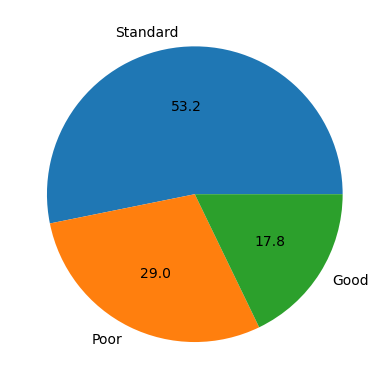

In [185]:
plt.pie(traindata['Credit_Score'].value_counts(), labels=traindata['Credit_Score'].value_counts().index, autopct='%.1f')
plt.show()

In [186]:
traindata.shape

(99992, 23)

# Data Preprocessing

In [187]:
cat_df=traindata.select_dtypes('category')

In [188]:
num_df=traindata.select_dtypes(exclude='category')

In [189]:
cols=cat_df.columns

In [190]:
cols

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [191]:
for col in cols:
    print(traindata[col].unique())

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
Categories (8, object): ['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May']
['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', ..., 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']
Length: 15
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']
['Good', 'Standard', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']
['No', 'NM', 'Yes']
Categories (3, object): ['NM', 'No', 'Yes']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'L

### Encoding

In [192]:
ohe=OneHotEncoder()

In [193]:
traindata['Credit_Mix']=traindata['Credit_Mix'].map({'Bad':0, 'Standard':1, 'Good':2})

In [196]:
traindata['Credit_Score']=pd.Categorical(traindata['Credit_Score'])
traindata['Credit_Score']=traindata['Credit_Score'].cat.codes
#encodedcreditscore=ohe.fit_transform(traindata['Credit_Score'].values.reshape(-1,1)).toarray()
#encodeddf=pd.DataFrame(encodedcreditscore, columns=ohe.get_feature_names_out(['Credit_Score']))
#traindata=pd.concat([traindata, encodeddf], axis=1)


In [197]:
traindata.drop(['Credit_Score'], axis=1, inplace=True)

In [198]:
traindata['Credit_Mix']=traindata['Credit_Mix'].astype('int')


In [199]:
LE=LabelEncoder()

In [200]:
OccupationCounts=traindata['Occupation'].value_counts()

In [201]:
OccupationCounts

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Developer        6720
Media_Manager    6712
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [202]:
traindata['Occupation']=traindata['Occupation'].map(OccupationCounts)

In [203]:
traindata['Month']=LE.fit_transform(traindata['Month'])

In [204]:
dummy_df=pd.get_dummies(traindata[['Payment_Behaviour', 'Payment_of_Min_Amount']], drop_first=True)

In [205]:
traindata=pd.concat([traindata, dummy_df], axis=1)
traindata.drop(['Payment_Behaviour', 'Payment_of_Min_Amount'], axis=1, inplace=True)

In [206]:
traindata.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,3,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,98.35409,304.555294,0,1,0,0,0,1,0
1,2,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,4.0,11.27,4.0,2,809.98,31.944960,265.0,49.574949,98.35409,304.555294,0,0,1,0,0,1,0
2,6,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,4.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,98.35409,304.555294,0,0,0,1,0,1,0
3,0,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,11.27,4.0,2,809.98,31.377862,268.0,49.574949,98.35409,304.555294,0,0,0,0,1,1,0
4,7,23.0,6744,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,98.35409,304.555294,1,0,0,0,0,1,0


In [207]:
traindata.dtypes

Month                                                   int32
Age                                                   float64
Occupation                                              int64
Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                     float64
Num_Credit_Card                                       float64
Interest_Rate                                         float64
Num_of_Loan                                           float64
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Credit_Mix                                              int32
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_H

### Data Splitting

In [208]:
X=traindata

In [209]:
y=encodedcreditscore

In [210]:
sm=SMOTE()
X,y= sm.fit_resample(X,y)

In [211]:
X.shape

(159507, 27)

In [212]:
#y.value_counts()

In [213]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

### Scaling

In [214]:
num_columns=num_df.columns

In [215]:
scalar = PowerTransformer()

In [216]:
X_train[num_columns]=scalar.fit_transform(X_train[num_columns])

In [217]:
import numpy as np

In [218]:
X_test[num_columns]=scalar.transform(X_test[num_columns])

In [219]:
# Model Building

### Neural Network

def VisualizeTrainResult(history, epochs):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(acc, label='Training MSE')
    plt.plot(val_acc, label='Validation_MSE')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1,2,2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()










In [220]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras import callbacks


In [221]:
##### Model 1

model = Sequential()

model.add(Dense(1024,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
# model.add(BatchNormalization())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
# model.add(BatchNormalization())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(3, activation="softmax"))

In [222]:
LR=callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, cooldown=1, verbose=1)
early_stopping=callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=Adam(learning_rate=0.2), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1024)              28672     
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 256)              

In [233]:
epochs=70
history = model.fit(
    np.array(X_train.values),y_train,
    #np.array(X_train.values),y_train,
    epochs=epochs,
    validation_split=0.2,
    batch_size=128,
    callbacks=[early_stopping, LR]
)

Epoch 1/70


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\user\anaconda3\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3, 2) and (None, 3) are incompatible


In [228]:
y_pred=model.predict(X_test)

997/997 [==============================] - 6s 5ms/step


In [232]:
print('{:34}|{}'.format('Raw Model Predictions', 'True Labels'))
for i,pred in enumerate(y_pred):
    print('{}|{}'.format(pred, y_test[i]))

Raw Model Predictions             |True Labels
[0.3199055  0.37242803 0.3076664 ]|[0 0 1]
[0.32002294 0.3721992  0.30777788]|[1 0 0]
[0.3199067  0.3724258  0.30766752]|[0 0 1]
[0.31990507 0.3724289  0.307666  ]|[1 0 0]
[0.32000458 0.37223494 0.30776045]|[1 0 0]
[0.31970754 0.3728141  0.3074783 ]|[0 1 0]
[0.31991982 0.37240016 0.30767998]|[0 0 1]
[0.31986168 0.37251356 0.30762482]|[0 1 0]
[0.32015675 0.37193847 0.30790472]|[0 1 0]
[0.31970528 0.3728185  0.3074762 ]|[1 0 0]
[0.31990615 0.37242678 0.307667  ]|[1 0 0]
[0.31992266 0.37239465 0.30768272]|[1 0 0]
[0.31970525 0.37281862 0.3074762 ]|[1 0 0]
[0.31992105 0.3723979  0.3076811 ]|[0 1 0]
[0.31990686 0.37242544 0.30766767]|[0 1 0]
[0.31992668 0.37238678 0.3076865 ]|[1 0 0]
[0.3201277  0.37199506 0.30787727]|[1 0 0]
[0.31989    0.3724584  0.30765164]|[0 1 0]
[0.31988725 0.3724637  0.3076491 ]|[1 0 0]
[0.31970507 0.37281895 0.30747604]|[1 0 0]
[0.31991887 0.37240198 0.3076791 ]|[0 0 1]
[0.31990477 0.37242958 0.30766574]|[1 0 0]
[0.3199

[0.3200083  0.37222776 0.3077639 ]|[0 0 1]
[0.31990835 0.37242264 0.30766907]|[0 1 0]
[0.31990564 0.37242785 0.30766654]|[0 0 1]
[0.320085   0.37207836 0.30783662]|[0 1 0]
[0.31992283 0.37239432 0.30768287]|[1 0 0]
[0.31970447 0.37282002 0.30747548]|[1 0 0]
[0.31990442 0.3724302  0.3076654 ]|[0 1 0]
[0.31983796 0.3725598  0.3076023 ]|[0 1 0]
[0.31995377 0.37233397 0.30771223]|[1 0 0]
[0.31991953 0.37240073 0.3076797 ]|[1 0 0]
[0.3198217  0.3725914  0.30758688]|[1 0 0]
[0.3198597  0.37251732 0.30762297]|[0 0 1]
[0.31994587 0.3723495  0.30770472]|[1 0 0]
[0.32015476 0.37194237 0.30790287]|[1 0 0]
[0.3198394  0.37255695 0.30760363]|[0 1 0]
[0.31985968 0.3725175  0.30762294]|[1 0 0]
[0.31990457 0.37242997 0.30766556]|[1 0 0]
[0.32008255 0.37208313 0.3078344 ]|[1 0 0]
[0.3201282  0.37199408 0.30787772]|[0 1 0]
[0.320023   0.37219915 0.3077779 ]|[1 0 0]
[0.32000595 0.37223238 0.30776167]|[1 0 0]
[0.31992397 0.37239206 0.3076839 ]|[0 0 1]
[0.32008502 0.37207824 0.30783674]|[0 1 0]
[0.32002312

[0.32015762 0.3719369  0.30790555]|[0 1 0]
[0.3199622  0.3723177  0.30772015]|[0 1 0]
[0.31996113 0.3723197  0.30771917]|[1 0 0]
[0.3199229  0.37239417 0.30768293]|[0 1 0]
[0.31983605 0.37256333 0.30760056]|[0 1 0]
[0.31970733 0.37281454 0.30747813]|[0 1 0]
[0.3200061  0.37223205 0.30776185]|[0 0 1]
[0.31994691 0.3723474  0.30770567]|[0 0 1]
[0.3197082  0.3728129  0.30747893]|[0 1 0]
[0.31970525 0.37281862 0.3074762 ]|[0 0 1]
[0.3199054  0.3724282  0.30766633]|[0 0 1]
[0.31983617 0.37256318 0.30760065]|[1 0 0]
[0.31994477 0.37235153 0.30770367]|[1 0 0]
[0.32000834 0.37222782 0.3077639 ]|[0 0 1]
[0.31994832 0.3723447  0.30770698]|[0 1 0]
[0.32002535 0.3721946  0.3077801 ]|[0 1 0]
[0.31996053 0.37232083 0.3077186 ]|[0 0 1]
[0.3198862  0.37246567 0.30764812]|[1 0 0]
[0.31988633 0.3724654  0.30764824]|[1 0 0]
[0.3199622  0.37231758 0.30772018]|[0 1 0]
[0.32000566 0.37223294 0.30776143]|[0 0 1]
[0.31996235 0.37231728 0.3077203 ]|[0 1 0]
[0.31992427 0.37239146 0.30768418]|[0 0 1]
[0.31970495

[0.31992167 0.37239668 0.3076817 ]|[0 1 0]
[0.3198867 0.3724647 0.3076486]|[1 0 0]
[0.32012874 0.3719931  0.3078782 ]|[0 1 0]
[0.32000613 0.372232   0.3077619 ]|[0 0 1]
[0.31990397 0.372431   0.307665  ]|[1 0 0]
[0.3201313  0.37198815 0.30788058]|[0 0 1]
[0.3199466  0.37234804 0.30770537]|[1 0 0]
[0.31983715 0.37256122 0.30760157]|[0 0 1]
[0.31985867 0.3725193  0.30762202]|[1 0 0]
[0.31992102 0.37239793 0.3076811 ]|[0 1 0]
[0.32002607 0.3721931  0.3077808 ]|[0 1 0]
[0.3199051  0.37242886 0.307666  ]|[0 1 0]
[0.32000604 0.37223214 0.3077618 ]|[1 0 0]
[0.31994644 0.37234834 0.30770522]|[1 0 0]
[0.31986207 0.3725128  0.30762514]|[0 1 0]
[0.31992227 0.3723955  0.3076823 ]|[0 1 0]
[0.3200044  0.37223533 0.30776027]|[1 0 0]
[0.3199215  0.37239698 0.30768153]|[0 1 0]
[0.31988996 0.37245852 0.30765158]|[0 1 0]
[0.31970707 0.3728151  0.3074779 ]|[0 0 1]
[0.31970614 0.3728169  0.30747703]|[0 0 1]
[0.31992117 0.37239754 0.30768123]|[0 0 1]
[0.31988904 0.3724602  0.30765074]|[0 1 0]
[0.32008505 0.

[0.31990802 0.37242317 0.30766878]|[0 1 0]
[0.32001787 0.37220913 0.307773  ]|[1 0 0]
[0.31986034 0.37251613 0.30762354]|[1 0 0]
[0.31996208 0.37231782 0.3077201 ]|[0 1 0]
[0.32013005 0.37199053 0.30787942]|[0 1 0]
[0.3198589  0.37251884 0.30762222]|[1 0 0]
[0.31992304 0.3723939  0.30768305]|[0 0 1]
[0.31970844 0.37281242 0.30747914]|[0 1 0]
[0.32008263 0.37208292 0.30783445]|[0 0 1]
[0.32015592 0.37194008 0.30790395]|[0 1 0]
[0.32013053 0.37198952 0.3078799 ]|[0 0 1]
[0.32000792 0.37222847 0.30776358]|[0 1 0]
[0.31988937 0.37245956 0.30765107]|[0 1 0]
[0.32002527 0.37219477 0.30778   ]|[0 0 1]
[0.32002297 0.3721992  0.30777788]|[1 0 0]
[0.32002506 0.37219512 0.30777982]|[0 1 0]
[0.31990486 0.37242937 0.3076658 ]|[1 0 0]
[0.3199252  0.37238967 0.30768508]|[0 1 0]
[0.32000628 0.37223166 0.30776203]|[0 0 1]
[0.32015768 0.37193677 0.30790558]|[0 1 0]
[0.3199216  0.37239674 0.30768165]|[0 1 0]
[0.31990418 0.3724306  0.3076652 ]|[1 0 0]
[0.3199185  0.37240273 0.30767876]|[0 1 0]
[0.31970674

[0.3199198  0.3724002  0.30767998]|[0 0 1]
[0.3200232  0.37219873 0.3077781 ]|[0 0 1]
[0.3199197 0.3724004 0.3076799]|[0 1 0]
[0.3198867 0.3724647 0.3076486]|[1 0 0]
[0.32002392 0.37219733 0.30777875]|[0 0 1]
[0.32015657 0.3719388  0.30790457]|[0 1 0]
[0.31992266 0.37239468 0.3076827 ]|[0 1 0]
[0.31990734 0.3724246  0.30766812]|[0 1 0]
[0.32008162 0.37208483 0.30783355]|[1 0 0]
[0.32008633 0.37207577 0.3078379 ]|[0 0 1]
[0.3199215  0.37239698 0.30768156]|[0 1 0]
[0.31970614 0.37281686 0.30747703]|[1 0 0]
[0.3199599  0.37232205 0.30771804]|[0 1 0]
[0.31990594 0.37242725 0.3076668 ]|[0 0 1]
[0.3199489  0.3723435  0.30770755]|[0 1 0]
[0.31992024 0.37239942 0.30768037]|[1 0 0]
[0.3200816  0.37208483 0.30783352]|[1 0 0]
[0.32012805 0.37199435 0.3078776 ]|[0 1 0]
[0.3199054  0.37242827 0.3076663 ]|[0 1 0]
[0.3199053  0.37242845 0.3076662 ]|[0 1 0]
[0.31970596 0.37281725 0.30747685]|[0 0 1]
[0.31970707 0.3728151  0.3074779 ]|[0 1 0]
[0.31994614 0.37234896 0.307705  ]|[1 0 0]
[0.3199062  0.372

[0.31983775 0.37256002 0.30760214]|[0 0 1]
[0.3197054  0.37281826 0.30747634]|[0 1 0]
[0.31991702 0.3724056  0.30767736]|[1 0 0]
[0.3198362  0.37256312 0.30760068]|[1 0 0]
[0.31992412 0.37239188 0.30768406]|[1 0 0]
[0.32012713 0.3719961  0.30787674]|[0 1 0]
[0.3198353  0.37256482 0.30759984]|[0 1 0]
[0.31991893 0.37240192 0.30767915]|[0 1 0]
[0.3197059 0.3728173 0.3074768]|[1 0 0]
[0.32012835 0.3719938  0.3078778 ]|[0 0 1]
[0.32015467 0.37194255 0.30790278]|[0 0 1]
[0.3201567  0.37193865 0.3079047 ]|[0 0 1]
[0.31992403 0.37239194 0.30768397]|[0 0 1]
[0.31990668 0.37242582 0.30766752]|[0 1 0]
[0.31990656 0.3724261  0.30766737]|[0 0 1]
[0.32009524 0.37205836 0.30784643]|[0 1 0]
[0.31985864 0.37251934 0.30762196]|[0 1 0]
[0.32008532 0.37207767 0.30783698]|[0 1 0]
[0.32000488 0.37223443 0.30776072]|[1 0 0]
[0.32008526 0.3720778  0.30783692]|[0 1 0]
[0.32013017 0.37199032 0.30787954]|[0 0 1]
[0.3200246  0.37219602 0.3077794 ]|[0 0 1]
[0.32008553 0.37207732 0.30783716]|[0 0 1]
[0.32015678 0.

[0.3201292  0.37199217 0.30787864]|[0 0 1]
[0.31985968 0.37251738 0.30762294]|[0 1 0]
[0.32002228 0.3722004  0.30777726]|[1 0 0]
[0.31992373 0.3723926  0.30768368]|[1 0 0]
[0.32015714 0.37193778 0.30790508]|[0 1 0]
[0.32012957 0.37199146 0.307879  ]|[0 1 0]
[0.319906   0.37242717 0.3076669 ]|[0 0 1]
[0.3198894  0.37245953 0.30765107]|[0 1 0]
[0.31990618 0.37242672 0.30766705]|[0 1 0]
[0.31994936 0.37234265 0.30770797]|[0 1 0]
[0.31994712 0.37234706 0.30770588]|[0 0 1]
[0.3199054  0.37242827 0.30766633]|[0 1 0]
[0.31990784 0.3724236  0.3076686 ]|[0 0 1]
[0.31990492 0.37242922 0.30766585]|[0 1 0]
[0.31990466 0.3724297  0.30766562]|[1 0 0]
[0.31995955 0.37232268 0.3077177 ]|[1 0 0]
[0.32015425 0.37194338 0.3079024 ]|[0 0 1]
[0.31992304 0.37239397 0.30768305]|[1 0 0]
[0.31996155 0.3723188  0.30771956]|[0 1 0]
[0.32012892 0.37199274 0.30787838]|[0 0 1]
[0.31988785 0.3724625  0.30764964]|[0 0 1]
[0.31985947 0.37251782 0.30762276]|[1 0 0]
[0.32000655 0.37223113 0.3077623 ]|[0 0 1]
[0.3199451 

[0.32012877 0.3719929  0.30787826]|[0 1 0]
[0.31970605 0.37281698 0.30747694]|[0 0 1]
[0.31970513 0.3728188  0.30747607]|[1 0 0]
[0.3200241  0.37219703 0.30777892]|[1 0 0]
[0.31983843 0.37255877 0.30760273]|[0 1 0]
[0.31991887 0.37240198 0.30767912]|[0 1 0]
[0.31992435 0.37239137 0.30768427]|[0 0 1]
[0.31986216 0.37251255 0.30762526]|[0 0 1]
[0.31983632 0.37256292 0.3076008 ]|[0 1 0]
[0.31992128 0.37239736 0.30768135]|[0 1 0]
[0.3198862  0.3724656  0.30764812]|[1 0 0]
[0.3199213  0.3723973  0.30768135]|[0 1 0]
[0.32000828 0.37222785 0.30776387]|[0 0 1]
[0.3197052  0.37281868 0.30747613]|[1 0 0]
[0.3199073  0.3724246  0.30766806]|[0 1 0]
[0.32015482 0.37194225 0.3079029 ]|[1 0 0]
[0.32008433 0.3720796  0.3078361 ]|[0 1 0]
[0.32015413 0.37194362 0.30790228]|[1 0 0]
[0.31985953 0.37251768 0.30762282]|[0 1 0]
[0.31997612 0.37229046 0.30773336]|[1 0 0]
[0.31970534 0.37281838 0.30747628]|[1 0 0]
[0.32012767 0.37199506 0.3078772 ]|[1 0 0]
[0.31988943 0.37245944 0.3076511 ]|[0 1 0]
[0.31994522

[0.31996274 0.3723166  0.30772066]|[0 0 1]
[0.31992525 0.3723896  0.30768514]|[0 1 0]
[0.31994617 0.37234876 0.30770504]|[0 1 0]
[0.3199072  0.37242487 0.307668  ]|[0 1 0]
[0.32012704 0.37199628 0.30787662]|[0 0 1]
[0.32000613 0.37223202 0.30776188]|[0 0 1]
[0.3199234 0.3723932 0.3076834]|[1 0 0]
[0.32002416 0.37219688 0.307779  ]|[0 0 1]
[0.32008538 0.3720776  0.30783704]|[0 1 0]
[0.32015434 0.37194315 0.3079025 ]|[0 0 1]
[0.32015523 0.37194136 0.30790332]|[0 0 1]
[0.31970567 0.37281767 0.30747658]|[1 0 0]
[0.319885 0.372468 0.307647]|[1 0 0]
[0.32000443 0.3722352  0.3077603 ]|[1 0 0]
[0.31996268 0.3723167  0.30772063]|[0 1 0]
[0.31988576 0.3724665  0.3076477 ]|[0 1 0]
[0.31983903 0.3725577  0.30760333]|[0 1 0]
[0.3199032  0.37243253 0.30766422]|[0 1 0]
[0.31970635 0.37281635 0.30747724]|[1 0 0]
[0.32000425 0.37223557 0.30776015]|[1 0 0]
[0.31990805 0.37242326 0.30766875]|[0 0 1]
[0.3198373 0.372561  0.3076017]|[0 0 1]
[0.31983948 0.3725568  0.30760372]|[0 1 0]
[0.31970662 0.37281588 

[0.32008368 0.37208092 0.30783543]|[0 0 1]
[0.32013014 0.37199032 0.3078795 ]|[0 1 0]
[0.3201283  0.37199396 0.3078778 ]|[1 0 0]
[0.3199052  0.37242875 0.3076661 ]|[0 1 0]
[0.3199039  0.37243116 0.30766493]|[1 0 0]
[0.32012755 0.37199527 0.30787712]|[1 0 0]
[0.3199054  0.37242827 0.30766633]|[1 0 0]
[0.32000774 0.37222895 0.30776337]|[0 0 1]
[0.31996188 0.37231833 0.30771986]|[0 1 0]
[0.3199077  0.3724238  0.30766845]|[0 1 0]
[0.31990436 0.37243035 0.30766535]|[0 0 1]
[0.31988597 0.37246615 0.30764788]|[1 0 0]
[0.31992167 0.3723966  0.3076817 ]|[0 1 0]
[0.31990772 0.37242374 0.3076685 ]|[0 1 0]
[0.31994903 0.37234333 0.30770764]|[0 1 0]
[0.32000813 0.37222815 0.30776373]|[0 1 0]
[0.31992564 0.37238896 0.30768546]|[0 0 1]
[0.3199457  0.3723497  0.30770457]|[0 0 1]
[0.3197057  0.37281772 0.3074766 ]|[0 1 0]
[0.32012862 0.37199327 0.3078781 ]|[1 0 0]
[0.32000595 0.37223238 0.30776167]|[0 0 1]
[0.3197066  0.3728159  0.30747744]|[0 0 1]
[0.31970793 0.37281343 0.3074787 ]|[0 1 0]
[0.31988692

[0.3199033  0.37243238 0.3076643 ]|[0 1 0]
[0.31994632 0.3723486  0.3077051 ]|[0 0 1]
[0.31988958 0.3724592  0.30765125]|[0 1 0]
[0.31990635 0.37242645 0.30766717]|[1 0 0]
[0.3201542  0.37194347 0.30790234]|[0 1 0]
[0.31990615 0.37242678 0.30766702]|[0 0 1]
[0.31986246 0.37251207 0.3076255 ]|[0 0 1]
[0.31991962 0.37240064 0.3076798 ]|[0 0 1]
[0.32015663 0.3719388  0.3079046 ]|[0 0 1]
[0.32008106 0.37208596 0.30783302]|[1 0 0]
[0.3199247  0.37239066 0.30768463]|[0 1 0]
[0.31990567 0.3724277  0.30766657]|[0 0 1]
[0.32002324 0.3721986  0.30777812]|[0 1 0]
[0.3198361  0.37256327 0.3076006 ]|[1 0 0]
[0.3201288  0.37199295 0.3078783 ]|[0 0 1]
[0.31988758 0.372463   0.30764937]|[0 0 1]
[0.31988585 0.37246627 0.3076478 ]|[1 0 0]
[0.32015386 0.371944   0.30790204]|[1 0 0]
[0.3199263  0.37238762 0.30768612]|[0 1 0]
[0.31990528 0.3724285  0.3076662 ]|[0 0 1]
[0.31991965 0.3724006  0.3076798 ]|[1 0 0]
[0.31970605 0.37281698 0.30747694]|[0 0 1]
[0.31970572 0.37281764 0.30747664]|[0 0 1]
[0.31990588

[0.31991884 0.37240216 0.30767906]|[1 0 0]
[0.3198377  0.37256023 0.30760208]|[1 0 0]
[0.31991822 0.37240338 0.3076785 ]|[1 0 0]
[0.319859   0.37251863 0.30762234]|[1 0 0]
[0.31990483 0.3724293  0.3076658 ]|[1 0 0]
[0.31990775 0.37242374 0.30766848]|[0 0 1]
[0.31992385 0.37239236 0.3076838 ]|[0 0 1]
[0.32000715 0.37223002 0.30776283]|[0 1 0]
[0.319841   0.37255386 0.30760518]|[1 0 0]
[0.32000744 0.3722294  0.3077631 ]|[0 1 0]
[0.31988648 0.37246507 0.30764836]|[1 0 0]
[0.3198368  0.37256196 0.3076012 ]|[1 0 0]
[0.31985947 0.37251782 0.30762276]|[1 0 0]
[0.32015672 0.37193862 0.3079047 ]|[0 1 0]
[0.31986192 0.37251312 0.307625  ]|[0 0 1]
[0.31990555 0.372428   0.30766645]|[0 0 1]
[0.31988648 0.37246516 0.30764836]|[1 0 0]
[0.32002294 0.3721992  0.30777785]|[0 1 0]
[0.32015532 0.37194124 0.30790338]|[0 0 1]
[0.3199187  0.37240237 0.30767894]|[1 0 0]
[0.32000422 0.3722357  0.3077601 ]|[0 0 1]
[0.31990483 0.3724293  0.3076658 ]|[0 0 1]
[0.31983605 0.37256342 0.30760053]|[1 0 0]
[0.31991786

[0.32000494 0.37223426 0.30776078]|[0 0 1]
[0.3197057  0.37281772 0.3074766 ]|[1 0 0]
[0.3201276  0.37199527 0.30787715]|[1 0 0]
[0.3199485  0.37234426 0.30770716]|[0 1 0]
[0.31990662 0.37242597 0.30766746]|[0 0 1]
[0.31983638 0.3725628  0.30760086]|[1 0 0]
[0.3199605  0.37232086 0.3077186 ]|[0 0 1]
[0.32000953 0.37222537 0.30776513]|[0 1 0]
[0.32015383 0.37194413 0.30790198]|[1 0 0]
[0.3200835  0.37208122 0.3078353 ]|[0 0 1]
[0.32000458 0.37223503 0.30776045]|[1 0 0]
[0.3201303  0.37199008 0.30787963]|[0 1 0]
[0.31990752 0.37242422 0.30766827]|[0 1 0]
[0.31991827 0.37240312 0.30767858]|[0 1 0]
[0.32002607 0.37219307 0.30778077]|[0 1 0]
[0.32002243 0.37220016 0.3077774 ]|[1 0 0]
[0.31994846 0.37234443 0.30770713]|[0 1 0]
[0.32000595 0.37223235 0.30776173]|[0 0 1]
[0.31991878 0.3724022  0.307679  ]|[0 1 0]
[0.31990695 0.37242526 0.30766773]|[0 1 0]
[0.32008252 0.37208316 0.3078344 ]|[1 0 0]
[0.3198896  0.37245917 0.30765128]|[0 0 1]
[0.31995958 0.37232265 0.30771774]|[1 0 0]
[0.32015556

[0.31994623 0.37234876 0.30770504]|[1 0 0]
[0.31992167 0.3723966  0.3076817 ]|[0 1 0]
[0.32000613 0.37223205 0.3077619 ]|[0 0 1]
[0.3199325  0.37237543 0.30769202]|[0 1 0]
[0.31990454 0.37242997 0.30766553]|[1 0 0]
[0.32015628 0.3719394  0.30790427]|[0 1 0]
[0.31996214 0.37231773 0.30772012]|[0 1 0]
[0.3199611  0.37231973 0.30771914]|[0 1 0]
[0.319983   0.37227705 0.30773997]|[1 0 0]
[0.32008165 0.37208477 0.30783358]|[1 0 0]
[0.31970525 0.37281862 0.3074762 ]|[0 0 1]
[0.3197043  0.37282044 0.30747527]|[0 0 1]
[0.31983903 0.3725577  0.30760333]|[0 0 1]
[0.31987286 0.37249172 0.3076354 ]|[0 1 0]
[0.32015446 0.37194288 0.3079026 ]|[0 1 0]
[0.32015696 0.37193817 0.30790487]|[0 1 0]
[0.31988776 0.37246266 0.30764955]|[0 0 1]
[0.3197052  0.37281868 0.30747613]|[1 0 0]
[0.31990486 0.3724293  0.30766582]|[1 0 0]
[0.32015488 0.3719421  0.307903  ]|[0 0 1]
[0.31983927 0.37255725 0.30760354]|[0 1 0]
[0.32012802 0.3719944  0.30787757]|[1 0 0]
[0.31994554 0.37235004 0.30770442]|[0 0 1]
[0.31988758

[0.31990683 0.3724255  0.30766764]|[0 1 0]
[0.31991816 0.37240344 0.30767837]|[0 1 0]
[0.3199262  0.37238777 0.307686  ]|[0 0 1]
[0.32000837 0.3722277  0.30776393]|[0 1 0]
[0.31991982 0.3724002  0.30768   ]|[1 0 0]
[0.32012752 0.37199542 0.30787706]|[0 0 1]
[0.32015762 0.3719369  0.3079055 ]|[0 0 1]
[0.31991854 0.37240258 0.3076788 ]|[1 0 0]
[0.32000586 0.3722325  0.3077616 ]|[0 0 1]
[0.3201544  0.3719431  0.30790251]|[0 0 1]
[0.32000804 0.37222832 0.30776367]|[0 1 0]
[0.32015494 0.37194204 0.30790305]|[0 0 1]
[0.32012832 0.3719938  0.3078778 ]|[1 0 0]
[0.3199072  0.37242484 0.307668  ]|[0 1 0]
[0.31970537 0.37281826 0.30747628]|[0 1 0]
[0.31988862 0.37246102 0.3076504 ]|[0 1 0]
[0.31991875 0.3724023  0.30767897]|[1 0 0]
[0.31994882 0.37234366 0.30770746]|[0 1 0]
[0.32008243 0.37208325 0.30783427]|[1 0 0]
[0.32012722 0.37199593 0.30787683]|[0 0 1]
[0.31996253 0.3723171  0.30772045]|[0 0 1]
[0.3198598  0.3725172  0.30762306]|[0 0 1]
[0.32008535 0.37207764 0.307837  ]|[0 1 0]
[0.31990612

[0.31992128 0.37239742 0.30768135]|[0 0 1]
[0.3199456  0.37234992 0.30770445]|[1 0 0]
[0.3199065  0.37242615 0.30766734]|[0 1 0]
[0.3199221 0.3723958 0.3076821]|[0 0 1]
[0.3198879  0.3724623  0.30764973]|[0 0 1]
[0.3197046  0.37281972 0.30747563]|[1 0 0]
[0.31983835 0.37255898 0.30760264]|[0 1 0]
[0.31970808 0.3728131  0.30747885]|[0 1 0]
[0.3201553  0.3719413  0.30790338]|[0 1 0]
[0.3197058 0.3728175 0.3074767]|[0 0 1]
[0.31990486 0.3724293  0.30766582]|[1 0 0]
[0.32008144 0.37208515 0.3078333 ]|[1 0 0]
[0.3199178  0.37240407 0.3076781 ]|[1 0 0]
[0.3198864  0.37246528 0.3076483 ]|[1 0 0]
[0.31994587 0.37234938 0.30770472]|[0 0 1]
[0.31985983 0.37251702 0.3076231 ]|[0 0 1]
[0.32012933 0.37199187 0.30787876]|[0 0 1]
[0.3199861  0.372271   0.30774292]|[1 0 0]
[0.31992266 0.37239468 0.3076827 ]|[1 0 0]
[0.31991914 0.3724016  0.30767933]|[1 0 0]
[0.31986088 0.3725151  0.30762407]|[0 0 1]
[0.32015696 0.37193817 0.30790487]|[0 1 0]
[0.319923   0.3723939  0.30768302]|[1 0 0]
[0.31988758 0.372

[0.32000473 0.37223464 0.30776057]|[1 0 0]
[0.3199203  0.37239924 0.30768043]|[1 0 0]
[0.31983808 0.37255958 0.3076024 ]|[0 0 1]
[0.319887   0.3724641  0.30764887]|[0 1 0]
[0.3200053  0.37223363 0.30776107]|[1 0 0]
[0.31988928 0.37245968 0.30765098]|[0 1 0]
[0.319919   0.37240174 0.30767918]|[0 0 1]
[0.32013085 0.37198898 0.3078802 ]|[0 0 1]
[0.3199074  0.37242448 0.30766818]|[0 1 0]
[0.3198371  0.37256142 0.3076015 ]|[0 0 1]
[0.32015648 0.37193906 0.30790448]|[0 1 0]
[0.32013178 0.3719872  0.30788106]|[0 1 0]
[0.32008365 0.37208095 0.30783543]|[0 0 1]
[0.31992447 0.3723911  0.3076844 ]|[0 0 1]
[0.31990805 0.3724231  0.30766878]|[0 0 1]
[0.3200052  0.3722337  0.30776104]|[1 0 0]
[0.3199075  0.37242427 0.30766827]|[0 0 1]
[0.3198897  0.3724589  0.30765137]|[0 1 0]
[0.32015464 0.37194264 0.30790275]|[1 0 0]
[0.3199073  0.3724246  0.30766812]|[0 1 0]
[0.3197083  0.37281278 0.307479  ]|[0 0 1]
[0.32012695 0.37199652 0.30787653]|[1 0 0]
[0.31986296 0.37251103 0.30762595]|[0 1 0]
[0.3200245 

[0.31990543 0.37242824 0.30766633]|[0 0 1]
[0.31995973 0.37232238 0.3077179 ]|[0 0 1]
[0.320154   0.37194374 0.3079022 ]|[0 1 0]
[0.32002452 0.37219617 0.3077793 ]|[0 0 1]
[0.31990787 0.3724235  0.3076686 ]|[0 1 0]
[0.31983918 0.37255746 0.30760342]|[0 0 1]
[0.31990612 0.37242693 0.307667  ]|[0 1 0]
[0.31988975 0.37245885 0.30765143]|[0 0 1]
[0.320129   0.37199253 0.30787843]|[0 0 1]
[0.31988594 0.37246615 0.30764788]|[1 0 0]
[0.31994724 0.3723467  0.307706  ]|[0 1 0]
[0.32002464 0.3721959  0.30777943]|[0 0 1]
[0.3199184  0.3724029  0.30767864]|[0 1 0]
[0.3199456 0.3723499 0.3077045]|[1 0 0]
[0.31992102 0.37239793 0.3076811 ]|[0 1 0]
[0.3197058  0.3728175  0.30747673]|[0 0 1]
[0.31992042 0.3723991  0.30768052]|[0 0 1]
[0.31970832 0.37281272 0.30747905]|[0 1 0]
[0.31992114 0.3723977  0.3076812 ]|[0 1 0]
[0.31994835 0.37234455 0.30770707]|[0 1 0]
[0.31988624 0.3724656  0.30764818]|[1 0 0]
[0.3201538  0.37194425 0.30790198]|[0 0 1]
[0.31991804 0.37240365 0.3076783 ]|[1 0 0]
[0.31994557 0.

[0.31990618 0.37242678 0.30766702]|[0 1 0]
[0.3201274  0.37199572 0.30787694]|[1 0 0]
[0.3199043 0.3724304 0.3076653]|[0 1 0]
[0.32000595 0.37223232 0.30776173]|[0 0 1]
[0.31990474 0.37242958 0.3076657 ]|[1 0 0]
[0.31990674 0.3724257  0.30766755]|[0 0 1]
[0.31994537 0.37235042 0.30770427]|[1 0 0]
[0.32002416 0.37219688 0.307779  ]|[0 0 1]
[0.31996003 0.37232178 0.30771813]|[0 0 1]
[0.3198896  0.37245917 0.30765128]|[0 0 1]
[0.3199245  0.37239107 0.30768445]|[0 0 1]
[0.3198361 0.3725633 0.3076006]|[0 1 0]
[0.31972405 0.3727818  0.30749404]|[1 0 0]
[0.31970832 0.3728126  0.30747905]|[0 1 0]
[0.32000786 0.37222868 0.30776352]|[0 1 0]
[0.32015708 0.37193784 0.30790505]|[0 0 1]
[0.32015347 0.37194487 0.30790165]|[1 0 0]
[0.32000798 0.37222838 0.3077636 ]|[0 0 1]
[0.31992567 0.37238887 0.3076855 ]|[0 1 0]
[0.319921   0.37239796 0.30768108]|[0 1 0]
[0.31990775 0.3724237  0.3076685 ]|[0 1 0]
[0.32012945 0.37199172 0.30787885]|[0 0 1]
[0.3198377  0.37256023 0.30760208]|[0 0 1]
[0.31991822 0.372

[0.3199471  0.37234706 0.30770585]|[0 0 1]
[0.32002273 0.37219954 0.30777764]|[1 0 0]
[0.31994605 0.37234902 0.3077049 ]|[1 0 0]
[0.3199065  0.37242615 0.30766732]|[0 1 0]
[0.31996012 0.37232167 0.30771828]|[0 0 1]
[0.31996062 0.37232062 0.3077187 ]|[0 0 1]
[0.31990463 0.37242976 0.3076656 ]|[1 0 0]
[0.3197057  0.37281767 0.30747664]|[1 0 0]
[0.31983858 0.37255862 0.30760285]|[0 0 1]
[0.3201542  0.3719434  0.30790237]|[1 0 0]
[0.31991798 0.37240377 0.30767825]|[0 0 1]
[0.3199058  0.37242758 0.30766666]|[0 0 1]
[0.32000706 0.37223023 0.3077627 ]|[0 1 0]
[0.31994936 0.37234268 0.30770797]|[0 1 0]
[0.3201555  0.37194094 0.30790353]|[0 0 1]
[0.31991902 0.37240174 0.30767924]|[0 0 1]
[0.31990814 0.37242302 0.30766886]|[0 0 1]
[0.32012773 0.37199494 0.3078773 ]|[0 0 1]
[0.31983763 0.3725603  0.30760202]|[0 0 1]
[0.3198631  0.3725107  0.30762613]|[0 1 0]
[0.32012782 0.37199473 0.30787736]|[1 0 0]
[0.31988952 0.37245926 0.30765122]|[0 0 1]
[0.32012752 0.37199548 0.30787706]|[1 0 0]
[0.31984842

[0.31990606 0.372427   0.3076669 ]|[0 1 0]
[0.31988788 0.3724624  0.30764967]|[0 0 1]
[0.32000637 0.37223154 0.30776206]|[0 1 0]
[0.32002312 0.37219885 0.30777803]|[1 0 0]
[0.31970605 0.37281707 0.3074769 ]|[0 1 0]
[0.3199055  0.37242812 0.3076664 ]|[0 0 1]
[0.3198896  0.3724591  0.30765128]|[0 1 0]
[0.32012913 0.37199235 0.30787858]|[0 0 1]
[0.319705   0.37281904 0.30747598]|[0 1 0]
[0.31988925 0.3724598  0.30765095]|[0 1 0]
[0.32012856 0.3719934  0.30787802]|[0 0 1]
[0.32015747 0.3719372  0.30790538]|[0 1 0]
[0.31986022 0.37251636 0.30762345]|[0 0 1]
[0.31990728 0.37242466 0.30766806]|[0 1 0]
[0.31983584 0.37256375 0.30760038]|[1 0 0]
[0.3198584  0.37251994 0.30762175]|[1 0 0]
[0.320082  0.3720841 0.3078339]|[1 0 0]
[0.3198401  0.3725556  0.30760428]|[0 1 0]
[0.31993356 0.37237343 0.30769303]|[0 1 0]
[0.32012814 0.37199423 0.30787766]|[1 0 0]
[0.31970593 0.37281722 0.30747685]|[0 0 1]
[0.31990585 0.37242746 0.30766675]|[0 0 1]
[0.32000446 0.37223515 0.30776033]|[1 0 0]
[0.31983817 0.

[0.32000732 0.3722297  0.30776298]|[0 1 0]
[0.319961   0.37231988 0.30771908]|[0 0 1]
[0.31996214 0.37231773 0.30772012]|[0 1 0]
[0.32002556 0.37219414 0.3077803 ]|[0 1 0]
[0.31990734 0.3724246  0.30766812]|[0 0 1]
[0.31992164 0.37239668 0.3076817 ]|[0 1 0]
[0.31986186 0.37251318 0.30762497]|[0 1 0]
[0.3198867  0.37246466 0.30764857]|[0 1 0]
[0.3200262  0.37219295 0.3077809 ]|[0 1 0]
[0.3199186  0.37240252 0.30767882]|[0 0 1]
[0.31991795 0.37240377 0.30767825]|[1 0 0]
[0.3198866  0.37246495 0.30764848]|[0 0 1]
[0.31986195 0.37251306 0.30762503]|[0 1 0]
[0.3198609  0.37251496 0.30762407]|[0 0 1]
[0.31990632 0.37242648 0.30766717]|[0 0 1]
[0.320006   0.37223217 0.3077618 ]|[1 0 0]
[0.319921   0.372398   0.30768102]|[0 1 0]
[0.31995967 0.37232256 0.30771783]|[0 0 1]
[0.31986225 0.37251243 0.30762535]|[0 0 1]
[0.3198367  0.3725621  0.30760115]|[0 0 1]
[0.3201533  0.37194526 0.3079015 ]|[0 0 1]
[0.3199263  0.37238765 0.3076861 ]|[0 0 1]
[0.31983817 0.37255934 0.3076025 ]|[0 1 0]
[0.31970462

[0.31990653 0.3724261  0.30766737]|[0 1 0]
[0.32012898 0.37199256 0.30787843]|[0 0 1]
[0.31990725 0.3724248  0.307668  ]|[0 0 1]
[0.31988943 0.37245947 0.3076511 ]|[1 0 0]
[0.31986216 0.37251267 0.30762523]|[0 1 0]
[0.31983885 0.37255803 0.30760312]|[0 1 0]
[0.32002398 0.37219712 0.30777884]|[1 0 0]
[0.3199075  0.37242427 0.30766824]|[0 0 1]
[0.31994885 0.37234366 0.3077075 ]|[0 1 0]
[0.3200818 0.3720846 0.3078337]|[1 0 0]
[0.3198892  0.37245992 0.3076509 ]|[0 0 1]
[0.3199465  0.3723481  0.30770534]|[1 0 0]
[0.32015336 0.37194514 0.30790156]|[0 1 0]
[0.320083   0.3720822  0.30783483]|[0 0 1]
[0.3199079  0.37242344 0.30766866]|[0 0 1]
[0.31992286 0.37239417 0.3076829 ]|[1 0 0]
[0.3197065  0.37281615 0.30747736]|[0 0 1]
[0.31995952 0.37232277 0.30771768]|[1 0 0]
[0.31990772 0.37242374 0.3076685 ]|[0 1 0]
[0.31970888 0.3728116  0.3074796 ]|[0 1 0]
[0.31986204 0.3725128  0.30762514]|[1 0 0]
[0.3200832  0.3720818  0.30783498]|[0 0 1]
[0.31970558 0.37281793 0.3074765 ]|[1 0 0]
[0.3198593  0.

[0.3199379  0.37236488 0.30769715]|[0 1 0]
[0.32013023 0.37199023 0.3078796 ]|[0 1 0]
[0.3200053 0.3722336 0.3077611]|[0 0 1]
[0.31990606 0.372427   0.30766693]|[0 0 1]
[0.319946   0.3723492  0.30770484]|[1 0 0]
[0.31991953 0.37240073 0.30767968]|[0 0 1]
[0.31992298 0.37239406 0.307683  ]|[0 1 0]
[0.31988662 0.3724649  0.3076485 ]|[1 0 0]
[0.32002458 0.3721961  0.30777937]|[0 1 0]
[0.31994617 0.3723489  0.307705  ]|[1 0 0]
[0.31994474 0.37235153 0.30770367]|[1 0 0]
[0.31988606 0.37246594 0.30764803]|[1 0 0]
[0.31970784 0.37281358 0.3074786 ]|[0 1 0]
[0.32015654 0.37193885 0.30790454]|[0 1 0]
[0.3199612  0.37231955 0.30771923]|[0 1 0]
[0.31970844 0.37281248 0.30747914]|[0 1 0]
[0.31992516 0.37238982 0.30768502]|[0 1 0]
[0.3198877  0.37246278 0.3076495 ]|[0 1 0]
[0.31991804 0.37240368 0.3076783 ]|[1 0 0]
[0.31994772 0.3723459  0.30770642]|[1 0 0]
[0.31996247 0.3723171  0.30772042]|[0 1 0]
[0.31996188 0.37231818 0.3077199 ]|[0 1 0]
[0.31995907 0.37232366 0.30771726]|[1 0 0]
[0.31983972 0.

[0.32002303 0.37219906 0.30777794]|[0 0 1]
[0.31986037 0.3725161  0.30762357]|[0 0 1]
[0.32012782 0.37199482 0.30787736]|[1 0 0]
[0.31988782 0.3724625  0.30764964]|[1 0 0]
[0.3199066  0.37242597 0.30766743]|[0 1 0]
[0.31994793 0.37234542 0.30770662]|[1 0 0]
[0.3199455  0.37235013 0.30770436]|[1 0 0]
[0.3199616  0.37231874 0.30771962]|[0 1 0]
[0.3199055  0.37242815 0.30766636]|[0 0 1]
[0.32000458 0.37223494 0.30776042]|[0 0 1]
[0.31996214 0.37231773 0.30772012]|[0 1 0]
[0.3201547  0.37194252 0.30790278]|[1 0 0]
[0.31988978 0.37245876 0.30765146]|[0 1 0]
[0.3200243  0.37219658 0.30777913]|[0 0 1]
[0.32000536 0.37223348 0.30776116]|[1 0 0]
[0.31992286 0.37239426 0.3076829 ]|[0 1 0]
[0.31995967 0.37232253 0.3077178 ]|[0 0 1]
[0.3200854  0.37207758 0.30783707]|[0 1 0]
[0.31983697 0.37256163 0.30760136]|[1 0 0]
[0.3199045  0.37242997 0.3076655 ]|[1 0 0]
[0.31990483 0.3724293  0.3076658 ]|[0 0 1]
[0.31996238 0.37231728 0.30772033]|[0 0 1]
[0.32008457 0.372079   0.3078363 ]|[0 1 0]
[0.32015663

[0.31990823 0.3724228  0.30766895]|[0 1 0]
[0.31992534 0.3723895  0.30768517]|[0 1 0]
[0.3198375  0.37256068 0.30760187]|[0 0 1]
[0.32002378 0.3721976  0.30777866]|[1 0 0]
[0.3199187  0.37240237 0.30767894]|[0 1 0]
[0.31990787 0.37242344 0.30766863]|[0 1 0]
[0.31995955 0.37232268 0.3077177 ]|[1 0 0]
[0.32008246 0.37208328 0.3078343 ]|[1 0 0]
[0.3199485  0.37234437 0.30770716]|[0 0 1]
[0.31986043 0.37251592 0.30762362]|[0 0 1]
[0.32000473 0.37223473 0.30776054]|[1 0 0]
[0.3198617  0.37251344 0.30762485]|[0 1 0]
[0.31992584 0.37238857 0.30768567]|[0 1 0]
[0.3198598  0.37251723 0.30762303]|[0 1 0]
[0.32015705 0.37193796 0.307905  ]|[0 1 0]
[0.31996068 0.37232056 0.30771875]|[0 0 1]
[0.31994778 0.37234572 0.3077065 ]|[0 1 0]
[0.3200246 0.372196  0.3077794]|[0 0 1]
[0.31996077 0.37232035 0.30771884]|[1 0 0]
[0.32010636 0.37203673 0.30785692]|[0 1 0]
[0.32002485 0.37219548 0.30777964]|[0 1 0]
[0.3199178  0.37240407 0.3076781 ]|[1 0 0]
[0.31994602 0.37234923 0.30770484]|[0 0 1]
[0.31992215 0.

[0.3199453  0.37235048 0.3077042 ]|[1 0 0]
[0.31983688 0.37256178 0.3076013 ]|[1 0 0]
[0.31988895 0.37246034 0.3076507 ]|[0 1 0]
[0.31986216 0.3725126  0.30762523]|[0 0 1]
[0.31988776 0.37246278 0.30764955]|[0 0 1]
[0.3200239  0.37219736 0.30777875]|[1 0 0]
[0.31994563 0.3723499  0.3077045 ]|[1 0 0]
[0.31970623 0.37281665 0.30747712]|[0 0 1]
[0.32012752 0.37199533 0.3078771 ]|[0 0 1]
[0.32000563 0.37223297 0.30776143]|[0 1 0]
[0.31992128 0.37239736 0.30768135]|[0 0 1]
[0.3199218  0.37239632 0.3076818 ]|[0 0 1]
[0.31970462 0.37281972 0.30747563]|[1 0 0]
[0.32012954 0.3719915  0.30787897]|[0 0 1]
[0.3198377  0.37256026 0.30760205]|[0 1 0]
[0.31970552 0.37281805 0.30747646]|[0 0 1]
[0.3199072  0.37242487 0.307668  ]|[0 1 0]
[0.31996277 0.37231654 0.30772072]|[0 0 1]
[0.31970537 0.37281826 0.30747634]|[1 0 0]
[0.32013118 0.37198833 0.3078805 ]|[0 1 0]
[0.3198589 0.3725189 0.3076222]|[0 0 1]
[0.3200045  0.37223515 0.3077604 ]|[0 1 0]
[0.3199605  0.37232086 0.3077186 ]|[0 0 1]
[0.3197083  0.

[0.31990513 0.37242883 0.30766606]|[1 0 0]
[0.3200836  0.372081   0.30783537]|[1 0 0]
[0.32002604 0.37219325 0.30778074]|[0 1 0]
[0.31988773 0.3724627  0.30764952]|[0 0 1]
[0.31970558 0.37281793 0.3074765 ]|[1 0 0]
[0.3200229  0.37219918 0.30777788]|[0 0 1]
[0.31995913 0.37232354 0.3077173 ]|[1 0 0]
[0.31996208 0.37231785 0.30772007]|[0 1 0]
[0.32005268 0.3721413  0.30780604]|[0 1 0]
[0.3199081  0.37242308 0.30766883]|[0 0 1]
[0.31990668 0.37242582 0.30766746]|[0 1 0]
[0.3201278  0.37199488 0.30787733]|[1 0 0]
[0.31990737 0.37242448 0.30766815]|[0 1 0]
[0.31983855 0.3725585  0.30760288]|[0 1 0]
[0.32015678 0.37193847 0.30790475]|[0 1 0]
[0.31983957 0.37255666 0.3076038 ]|[0 1 0]
[0.31992048 0.3723989  0.30768058]|[0 1 0]
[0.31970873 0.37281176 0.30747947]|[0 1 0]
[0.32000545 0.37223327 0.30776125]|[1 0 0]
[0.32002452 0.37219617 0.30777934]|[0 0 1]
[0.3201296  0.37199137 0.30787903]|[0 0 1]
[0.31995896 0.37232387 0.30771714]|[1 0 0]
[0.3200836  0.37208104 0.30783537]|[1 0 0]
[0.31988576

[0.32015687 0.37193823 0.30790487]|[0 1 0]
[0.31983593 0.3725636  0.3076004 ]|[1 0 0]
[0.32015422 0.37194338 0.30790234]|[1 0 0]
[0.31991947 0.3724008  0.30767968]|[0 0 1]
[0.3199232  0.37239358 0.30768323]|[1 0 0]
[0.31970522 0.37281853 0.30747616]|[1 0 0]
[0.32013586 0.3719792  0.30788493]|[0 1 0]
[0.31994817 0.372345   0.30770683]|[0 1 0]
[0.32002595 0.3721934  0.30778065]|[1 0 0]
[0.32000536 0.3722334  0.30776116]|[1 0 0]
[0.31992352 0.37239298 0.3076835 ]|[1 0 0]
[0.32002488 0.37219548 0.30777964]|[0 0 1]
[0.31990686 0.3724255  0.30766764]|[0 1 0]
[0.32012796 0.37199453 0.3078775 ]|[1 0 0]
[0.3201278  0.37199494 0.30787733]|[0 0 1]
[0.31992027 0.37239933 0.3076804 ]|[0 1 0]
[0.31994614 0.3723489  0.30770496]|[1 0 0]
[0.31990767 0.37242395 0.30766842]|[0 1 0]
[0.32008326 0.37208164 0.30783507]|[1 0 0]
[0.31996238 0.37231737 0.3077203 ]|[0 1 0]
[0.31970564 0.3728178  0.30747658]|[1 0 0]
[0.3200247 0.3721958 0.3077795]|[0 0 1]
[0.31983727 0.37256107 0.3076017 ]|[0 0 1]
[0.32008553 0.

[0.31983754 0.37256053 0.3076019 ]|[0 1 0]
[0.31995586 0.37232995 0.30771416]|[1 0 0]
[0.3198595  0.37251768 0.3076228 ]|[1 0 0]
[0.31986237 0.3725122  0.3076254 ]|[0 1 0]
[0.31991988 0.37240013 0.30768   ]|[0 0 1]
[0.31970736 0.3728145  0.30747813]|[0 0 1]
[0.31990463 0.37242982 0.30766556]|[1 0 0]
[0.32015508 0.37194178 0.30790317]|[0 0 1]
[0.32015467 0.37194252 0.30790278]|[0 0 1]
[0.3199064  0.3724264  0.30766723]|[0 1 0]
[0.3199482  0.37234497 0.30770686]|[0 1 0]
[0.31986213 0.37251273 0.3076252 ]|[0 1 0]
[0.3198362  0.37256318 0.30760068]|[0 0 1]
[0.32015416 0.3719435  0.3079023 ]|[1 0 0]
[0.319947   0.37234724 0.30770576]|[0 0 1]
[0.32015797 0.37193617 0.30790585]|[0 1 0]
[0.31970897 0.37281138 0.30747962]|[0 0 1]
[0.31986    0.37251675 0.30762324]|[0 0 1]
[0.3198609  0.37251502 0.30762407]|[0 1 0]
[0.3197058 0.3728175 0.3074767]|[0 0 1]
[0.32011682 0.37201628 0.3078669 ]|[1 0 0]
[0.32008383 0.37208056 0.30783555]|[0 0 1]
[0.31988734 0.3724635  0.30764917]|[0 0 1]
[0.31991804 0.

[0.31992218 0.3723957  0.30768216]|[0 1 0]
[0.32000616 0.37223184 0.3077619 ]|[0 0 1]
[0.31990582 0.37242758 0.30766666]|[1 0 0]
[0.31990382 0.3724314  0.30766484]|[0 0 1]
[0.31970596 0.3728172  0.30747688]|[1 0 0]
[0.31985953 0.37251768 0.30762282]|[0 0 1]
[0.3199061  0.37242696 0.30766696]|[0 0 1]
[0.32000476 0.3722347  0.3077606 ]|[1 0 0]
[0.3197087  0.37281188 0.3074794 ]|[0 1 0]
[0.31992272 0.3723946  0.30768275]|[0 1 0]
[0.31993607 0.3723685  0.30769536]|[0 1 0]
[0.3199246  0.37239087 0.3076845 ]|[0 1 0]
[0.320005   0.37223417 0.30776083]|[1 0 0]
[0.32002345 0.37219822 0.30777833]|[1 0 0]
[0.32012823 0.371994   0.30787775]|[0 0 1]
[0.32013124 0.37198818 0.30788055]|[1 0 0]
[0.3200824  0.37208337 0.30783424]|[0 0 1]
[0.31990644 0.37242627 0.3076673 ]|[0 0 1]
[0.32015505 0.37194178 0.30790314]|[0 0 1]
[0.31970844 0.37281245 0.30747917]|[0 1 0]
[0.31990647 0.37242615 0.30766732]|[0 1 0]
[0.31985855 0.37251946 0.3076219 ]|[1 0 0]
[0.319924   0.37239203 0.30768397]|[0 0 1]
[0.3197069 

[0.32002473 0.37219578 0.30777952]|[0 1 0]
[0.32000765 0.37222904 0.30776328]|[0 1 0]
[0.31988603 0.372466   0.30764794]|[1 0 0]
[0.31990573 0.3724277  0.3076666 ]|[0 0 1]
[0.31990466 0.3724297  0.30766565]|[1 0 0]
[0.32012856 0.37199336 0.30787805]|[1 0 0]
[0.31990504 0.37242898 0.307666  ]|[0 0 1]
[0.31985936 0.37251797 0.30762264]|[0 0 1]
[0.31985942 0.37251785 0.3076227 ]|[1 0 0]
[0.3199455  0.3723501  0.30770442]|[0 0 1]
[0.3200063  0.37223166 0.30776203]|[0 0 1]
[0.3199076  0.37242404 0.30766833]|[0 1 0]
[0.3199593 0.3723232 0.3077175]|[1 0 0]
[0.31990632 0.37242648 0.30766717]|[0 0 1]
[0.32015443 0.3719429  0.30790257]|[1 0 0]
[0.32012814 0.37199414 0.30787766]|[1 0 0]
[0.31991062 0.37241805 0.30767125]|[1 0 0]
[0.31988642 0.37246522 0.30764833]|[0 1 0]
[0.32008588 0.37207666 0.30783752]|[0 0 1]
[0.31996015 0.37232164 0.30771825]|[0 0 1]
[0.3199055  0.3724281  0.30766642]|[0 0 1]
[0.31988662 0.37246493 0.30764848]|[1 0 0]
[0.31992075 0.37239835 0.30768088]|[0 1 0]
[0.3198553  0.

[0.31990469 0.37242967 0.30766565]|[1 0 0]
[0.31990644 0.3724262  0.3076673 ]|[0 1 0]
[0.3199187  0.37240243 0.3076789 ]|[0 0 1]
[0.31983936 0.372557   0.3076036 ]|[0 0 1]
[0.3200264  0.3721925  0.30778104]|[0 0 1]
[0.31983754 0.37256053 0.3076019 ]|[0 0 1]
[0.31992042 0.372399   0.30768055]|[0 1 0]
[0.32000646 0.37223136 0.30776218]|[0 0 1]
[0.32008266 0.37208283 0.30783454]|[1 0 0]
[0.32015613 0.37193966 0.30790415]|[0 1 0]
[0.32001585 0.37221295 0.30777112]|[0 1 0]
[0.32002452 0.3721961  0.3077793 ]|[0 0 1]
[0.31970555 0.37281802 0.30747643]|[1 0 0]
[0.32013375 0.3719833  0.30788293]|[0 1 0]
[0.31986007 0.37251663 0.30762333]|[0 0 1]
[0.31983587 0.3725638  0.30760035]|[1 0 0]
[0.32013053 0.37198952 0.3078799 ]|[0 1 0]
[0.31992182 0.37239623 0.30768195]|[1 0 0]
[0.31990644 0.3724263  0.30766726]|[1 0 0]
[0.31996056 0.37232077 0.30771863]|[0 0 1]
[0.31990558 0.3724279  0.30766648]|[0 0 1]
[0.3199449  0.37235135 0.3077038 ]|[1 0 0]
[0.31970522 0.37281856 0.30747616]|[0 1 0]
[0.3197171 

[0.3199182  0.37240335 0.3076785 ]|[1 0 0]
[0.31991902 0.37240165 0.30767927]|[0 0 1]
[0.31994817 0.37234497 0.30770686]|[0 1 0]
[0.31990662 0.37242588 0.30766743]|[0 0 1]
[0.32002336 0.37219834 0.30777824]|[0 0 1]
[0.31989306 0.37245232 0.30765462]|[0 1 0]
[0.3200057 0.3722328 0.3077615]|[0 0 1]
[0.31992328 0.37239346 0.30768326]|[0 1 0]
[0.32015657 0.37193885 0.30790454]|[0 1 0]
[0.31994805 0.37234527 0.30770674]|[0 1 0]
[0.3199452 0.3723507 0.3077041]|[1 0 0]
[0.3200259  0.37219355 0.30778056]|[0 1 0]
[0.31990433 0.3724304  0.3076653 ]|[1 0 0]
[0.32012823 0.37199402 0.30787775]|[1 0 0]
[0.31970555 0.37281787 0.3074765 ]|[0 1 0]
[0.3199073  0.37242454 0.3076681 ]|[0 1 0]
[0.31970707 0.3728151  0.30747786]|[0 0 1]
[0.32002506 0.37219515 0.3077798 ]|[0 0 1]
[0.3198889  0.37246048 0.30765063]|[0 1 0]
[0.3199615  0.37231898 0.30771953]|[0 1 0]
[0.31970775 0.37281376 0.30747852]|[0 1 0]
[0.31996062 0.3723207  0.30771866]|[1 0 0]
[0.3198374  0.37256083 0.30760175]|[0 0 1]
[0.31985933 0.372

[0.31983688 0.37256175 0.3076013 ]|[1 0 0]
[0.32008255 0.37208307 0.3078344 ]|[1 0 0]
[0.3201282  0.37199405 0.30787772]|[1 0 0]
[0.32012832 0.3719938  0.3078778 ]|[0 1 0]
[0.31985965 0.3725175  0.30762294]|[1 0 0]
[0.31991842 0.37240285 0.30767867]|[1 0 0]
[0.32002458 0.3721961  0.30777937]|[0 0 1]
[0.31992412 0.3723918  0.30768406]|[0 0 1]
[0.3198608  0.37251523 0.30762398]|[0 1 0]
[0.3198588 0.3725191 0.3076221]|[0 0 1]
[0.32013085 0.37198886 0.3078802 ]|[0 1 0]
[0.31992123 0.37239745 0.3076813 ]|[0 1 0]
[0.31992316 0.37239367 0.3076832 ]|[0 1 0]
[0.31986    0.37251675 0.30762324]|[0 1 0]
[0.3200824  0.3720833  0.30783427]|[0 1 0]
[0.31990415 0.37243068 0.30766517]|[1 0 0]
[0.3200055  0.37223324 0.30776128]|[1 0 0]
[0.3200077  0.37222886 0.30776334]|[0 1 0]
[0.31990516 0.37242875 0.3076661 ]|[0 1 0]
[0.32009628 0.37205628 0.3078474 ]|[1 0 0]
[0.3199594  0.37232313 0.30771753]|[1 0 0]
[0.3199244  0.3723912  0.30768433]|[0 0 1]
[0.3200046  0.372235   0.30776045]|[1 0 0]
[0.32002425 0.

[0.319837   0.37256148 0.30760142]|[1 0 0]
[0.31990606 0.37242702 0.3076669 ]|[0 0 1]
[0.31970719 0.37281486 0.30747798]|[0 1 0]
[0.31988645 0.37246507 0.30764836]|[1 0 0]
[0.32002357 0.37219802 0.30777845]|[1 0 0]
[0.31990513 0.3724288  0.30766606]|[0 0 1]
[0.31985852 0.37251964 0.30762187]|[1 0 0]
[0.3200053  0.37223363 0.3077611 ]|[1 0 0]
[0.3198383  0.3725592  0.30760258]|[0 0 1]
[0.31992197 0.372396   0.30768198]|[0 1 0]
[0.31970486 0.3728193  0.30747584]|[0 0 1]
[0.32015562 0.3719407  0.30790368]|[0 0 1]
[0.32002312 0.37219885 0.30777803]|[0 0 1]
[0.31992418 0.3723917  0.30768412]|[0 0 1]
[0.31990817 0.37242302 0.30766886]|[0 0 1]
[0.31993115 0.37237808 0.30769074]|[1 0 0]
[0.3200845  0.37207922 0.30783623]|[0 0 1]
[0.31990457 0.37242994 0.30766553]|[0 0 1]
[0.3200247  0.37219578 0.3077795 ]|[0 1 0]
[0.31988758 0.372463   0.3076494 ]|[0 1 0]
[0.31990686 0.37242547 0.30766764]|[0 0 1]
[0.3199062  0.37242672 0.30766705]|[0 0 1]
[0.31992415 0.37239185 0.30768406]|[0 1 0]
[0.31983656

[0.31994793 0.37234545 0.30770665]|[0 1 0]
[0.32012737 0.37199566 0.30787694]|[1 0 0]
[0.31996256 0.37231693 0.30772048]|[0 1 0]
[0.32015714 0.3719378  0.30790508]|[0 1 0]
[0.32013053 0.3719896  0.3078799 ]|[0 0 1]
[0.31996182 0.37231836 0.30771983]|[0 1 0]
[0.3199228 0.3723944 0.3076828]|[1 0 0]
[0.32008415 0.37207988 0.3078359 ]|[0 0 1]
[0.31992507 0.3723899  0.30768496]|[0 1 0]
[0.3200235  0.37219816 0.3077784 ]|[0 0 1]
[0.31992307 0.37239382 0.30768308]|[1 0 0]
[0.31990784 0.3724236  0.30766857]|[0 0 1]
[0.31970707 0.37281507 0.3074779 ]|[0 0 1]
[0.319906   0.3724271  0.30766687]|[0 0 1]
[0.31995988 0.3723221  0.307718  ]|[1 0 0]
[0.3200056  0.37223303 0.30776137]|[1 0 0]
[0.3199186  0.37240252 0.30767882]|[0 1 0]
[0.31970778 0.37281367 0.30747858]|[0 1 0]
[0.31988668 0.37246484 0.30764854]|[1 0 0]
[0.3200252  0.37219483 0.30777994]|[0 0 1]
[0.32002646 0.37219244 0.3077811 ]|[0 1 0]
[0.31992495 0.3723902  0.3076848 ]|[0 1 0]
[0.31985837 0.37251994 0.30762172]|[0 0 1]
[0.32002312 0.

[0.31992415 0.37239176 0.3076841 ]|[0 1 0]
[0.31983587 0.37256375 0.30760038]|[1 0 0]
[0.31986132 0.3725141  0.3076245 ]|[0 0 1]
[0.32002398 0.37219715 0.30777884]|[0 0 1]
[0.31991842 0.37240288 0.30767867]|[1 0 0]
[0.320128  0.3719945 0.3078775]|[1 0 0]
[0.3199456  0.3723499  0.30770448]|[1 0 0]
[0.3201555  0.37194094 0.30790353]|[0 0 1]
[0.3201542  0.37194356 0.30790234]|[1 0 0]
[0.319886   0.372466   0.30764794]|[1 0 0]
[0.31990573 0.3724276  0.30766663]|[0 0 1]
[0.3199592  0.37232342 0.30771738]|[1 0 0]
[0.3199071  0.37242505 0.3076679 ]|[0 1 0]
[0.31992558 0.37238902 0.30768538]|[0 1 0]
[0.31996104 0.3723199  0.30771908]|[0 1 0]
[0.31992266 0.3723947  0.3076827 ]|[1 0 0]
[0.32015395 0.37194392 0.30790213]|[1 0 0]
[0.32015443 0.37194303 0.30790257]|[1 0 0]
[0.3201282  0.37199405 0.30787772]|[0 0 1]
[0.3201562  0.37193966 0.30790415]|[1 0 0]
[0.31986117 0.37251443 0.30762434]|[0 1 0]
[0.31970617 0.37281674 0.30747706]|[1 0 0]
[0.31990784 0.37242362 0.3076686 ]|[0 1 0]
[0.320023  0.3

[0.3198899  0.3724586  0.30765155]|[0 1 0]
[0.3198394  0.37255707 0.30760363]|[0 0 1]
[0.32003164 0.37218225 0.3077861 ]|[0 1 0]
[0.31986234 0.3725123  0.30762538]|[0 1 0]
[0.31983715 0.37256134 0.30760154]|[1 0 0]
[0.32008374 0.37208074 0.30783552]|[1 0 0]
[0.32002965 0.3721862  0.30778417]|[1 0 0]
[0.31992292 0.37239414 0.30768293]|[1 0 0]
[0.32000804 0.37222824 0.30776367]|[0 1 0]
[0.3198868  0.37246445 0.3076487 ]|[1 0 0]
[0.31970719 0.37281483 0.30747798]|[0 1 0]
[0.3200049  0.37223428 0.30776072]|[0 1 0]
[0.31985882 0.37251908 0.3076221 ]|[1 0 0]
[0.31985953 0.37251776 0.30762276]|[0 1 0]
[0.31990883 0.37242168 0.30766955]|[0 1 0]
[0.32015473 0.3719425  0.30790284]|[0 0 1]
[0.32002267 0.37219974 0.3077776 ]|[0 0 1]
[0.3200261  0.37219307 0.3077808 ]|[0 1 0]
[0.32002357 0.37219802 0.30777845]|[1 0 0]
[0.31990615 0.37242678 0.30766702]|[0 0 1]
[0.3200043  0.37223554 0.30776018]|[1 0 0]
[0.31990466 0.37242976 0.30766562]|[0 1 0]
[0.31996033 0.3723213  0.3077184 ]|[1 0 0]
[0.319919  

[0.31995976 0.37232238 0.3077179 ]|[0 0 1]
[0.31990713 0.37242493 0.30766794]|[0 0 1]
[0.31995955 0.37232268 0.3077177 ]|[1 0 0]
[0.31990427 0.37243038 0.3076653 ]|[0 1 0]
[0.31983623 0.3725631  0.30760068]|[0 0 1]
[0.3198597  0.3725173  0.30762297]|[0 0 1]
[0.31994775 0.37234575 0.30770648]|[1 0 0]
[0.3197063  0.37281656 0.30747715]|[0 0 1]
[0.32000545 0.37223333 0.30776122]|[1 0 0]
[0.31983984 0.37255612 0.30760407]|[0 0 1]
[0.31992564 0.37238896 0.30768546]|[0 1 0]
[0.32015485 0.37194216 0.30790296]|[0 1 0]
[0.31995827 0.37232524 0.30771652]|[1 0 0]
[0.31999138 0.37226075 0.30774784]|[1 0 0]
[0.32000682 0.37223062 0.3077625 ]|[0 0 1]
[0.31997213 0.37229827 0.30772963]|[1 0 0]
[0.3199597  0.37232244 0.30771786]|[1 0 0]
[0.3200246 0.372196  0.3077794]|[0 1 0]
[0.31990817 0.3724229  0.3076689 ]|[0 1 0]
[0.3199484  0.37234446 0.30770707]|[0 0 1]
[0.31970814 0.37281296 0.30747887]|[0 1 0]
[0.31992555 0.37238917 0.30768538]|[0 1 0]
[0.31988743 0.37246338 0.30764922]|[0 0 1]
[0.3198857  0.

[0.32002512 0.37219498 0.3077799 ]|[0 1 0]
[0.31986248 0.37251198 0.30762556]|[0 0 1]
[0.3199599 0.3723221 0.307718 ]|[1 0 0]
[0.31991845 0.3724028  0.30767873]|[1 0 0]
[0.320128   0.37199455 0.3078775 ]|[0 0 1]
[0.31990504 0.37242892 0.30766597]|[0 1 0]
[0.32002628 0.37219277 0.30778095]|[0 1 0]
[0.31990427 0.3724304  0.30766526]|[1 0 0]
[0.31992477 0.3723905  0.3076847 ]|[0 0 1]
[0.32013288 0.371985   0.30788216]|[1 0 0]
[0.3198589  0.37251887 0.30762222]|[0 0 1]
[0.31996122 0.3723195  0.3077193 ]|[0 1 0]
[0.31990412 0.37243074 0.3076651 ]|[1 0 0]
[0.3199396  0.37236154 0.3076988 ]|[1 0 0]
[0.31983593 0.37256372 0.3076004 ]|[0 1 0]
[0.32002503 0.37219515 0.3077798 ]|[0 0 1]
[0.3198387  0.37255824 0.307603  ]|[0 1 0]
[0.31994632 0.37234858 0.30770516]|[1 0 0]
[0.31995973 0.37232238 0.3077179 ]|[1 0 0]
[0.3200058  0.37223265 0.30776158]|[1 0 0]
[0.31994605 0.37234908 0.3077049 ]|[1 0 0]
[0.32003796 0.37217003 0.30779207]|[1 0 0]
[0.320131  0.3719887 0.3078803]|[0 0 1]
[0.31986174 0.372

[0.3199083  0.37242275 0.307669  ]|[0 0 1]
[0.3199218  0.37239647 0.3076818 ]|[0 1 0]
[0.3199149  0.3724098  0.30767533]|[1 0 0]
[0.31988794 0.3724623  0.30764973]|[0 0 1]
[0.31996268 0.37231663 0.30772063]|[0 0 1]
[0.32000598 0.37223232 0.30776176]|[1 0 0]
[0.320083   0.37208223 0.3078348 ]|[0 0 1]
[0.3199051  0.37242886 0.30766603]|[0 1 0]
[0.3198364  0.3725627  0.30760086]|[0 1 0]
[0.31995085 0.37233964 0.30770943]|[1 0 0]
[0.3197055  0.37281808 0.30747643]|[0 0 1]
[0.31994897 0.37234345 0.3077076 ]|[0 1 0]
[0.31992126 0.3723974  0.30768135]|[0 1 0]
[0.32012767 0.37199506 0.3078772 ]|[1 0 0]
[0.32015517 0.37194157 0.30790326]|[0 0 1]
[0.3198376  0.37256044 0.30760196]|[0 1 0]
[0.32014257 0.37196603 0.30789134]|[1 0 0]
[0.31986195 0.372513   0.30762506]|[0 1 0]
[0.31988654 0.37246507 0.3076484 ]|[0 1 0]
[0.31990406 0.37243086 0.30766505]|[0 1 0]
[0.31992304 0.3723939  0.30768305]|[1 0 0]
[0.32012802 0.3719944  0.30787757]|[0 1 0]
[0.32002148 0.37220204 0.30777645]|[0 1 0]
[0.31970692

[0.31986234 0.3725123  0.30762538]|[0 1 0]
[0.32015696 0.3719381  0.3079049 ]|[0 1 0]
[0.31983885 0.37255794 0.30760315]|[0 1 0]
[0.3200247  0.37219578 0.3077795 ]|[1 0 0]
[0.31991827 0.37240317 0.30767855]|[1 0 0]
[0.32015482 0.37194225 0.3079029 ]|[0 0 1]
[0.31992137 0.37239715 0.30768147]|[0 0 1]
[0.3199451  0.37235087 0.30770403]|[0 0 1]
[0.3199186  0.37240252 0.30767885]|[1 0 0]
[0.32008308 0.37208202 0.3078349 ]|[0 0 1]
[0.31992278 0.3723944  0.3076828 ]|[1 0 0]
[0.31996268 0.37231675 0.3077206 ]|[0 1 0]
[0.32002574 0.37219387 0.30778044]|[0 1 0]
[0.31985945 0.37251788 0.3076227 ]|[0 0 1]
[0.32015428 0.3719432  0.30790246]|[1 0 0]
[0.31992164 0.3723967  0.30768168]|[0 1 0]
[0.3199591 0.3723236 0.3077173]|[1 0 0]
[0.3199058  0.37242758 0.3076667 ]|[0 0 1]
[0.3200086  0.37222725 0.30776417]|[0 1 0]
[0.31990767 0.37242398 0.3076684 ]|[0 1 0]
[0.31994566 0.37234986 0.30770454]|[1 0 0]
[0.3198594  0.37251794 0.30762267]|[1 0 0]
[0.31991816 0.37240344 0.30767843]|[1 0 0]
[0.31990707 0.

[0.3198376  0.37256047 0.307602  ]|[0 0 1]
[0.31986046 0.3725159  0.30762365]|[0 0 1]
[0.31986198 0.3725129  0.3076251 ]|[0 1 0]
[0.3200248  0.3721956  0.30777958]|[0 0 1]
[0.3201289  0.37199277 0.30787838]|[1 0 0]
[0.31986174 0.37251338 0.30762485]|[0 1 0]
[0.31983674 0.37256202 0.30760115]|[1 0 0]
[0.31992543 0.37238935 0.30768526]|[0 1 0]
[0.31995958 0.3723227  0.30771774]|[1 0 0]
[0.32002512 0.372195   0.30777988]|[0 1 0]
[0.3199886  0.37226617 0.30774528]|[1 0 0]
[0.31990513 0.3724288  0.30766606]|[1 0 0]
[0.3200819  0.37208432 0.3078338 ]|[1 0 0]
[0.32000744 0.3722294  0.30776313]|[0 0 1]
[0.3197049  0.37281927 0.30747586]|[1 0 0]
[0.32008517 0.372078   0.30783686]|[0 1 0]
[0.31983715 0.37256122 0.30760157]|[0 0 1]
[0.3199609  0.3723202  0.30771893]|[0 0 1]
[0.319861   0.37251487 0.30762413]|[0 0 1]
[0.31986034 0.37251613 0.30762354]|[0 0 1]
[0.31990635 0.37242645 0.30766723]|[0 1 0]
[0.31990805 0.37242314 0.30766878]|[0 1 0]
[0.31988633 0.3724654  0.30764827]|[1 0 0]
[0.3199471 

[0.3201283 0.3719939 0.3078778]|[1 0 0]
[0.3198597  0.37251732 0.30762297]|[0 0 1]
[0.32008392 0.37208042 0.30783567]|[0 0 1]
[0.31991917 0.37240142 0.30767938]|[0 0 1]
[0.31992304 0.372394   0.30768305]|[1 0 0]
[0.31970447 0.37282005 0.30747545]|[1 0 0]
[0.3198617  0.37251338 0.30762485]|[0 1 0]
[0.31994542 0.3723503  0.3077043 ]|[1 0 0]
[0.31994537 0.3723504  0.30770427]|[0 0 1]
[0.31990686 0.37242544 0.30766767]|[0 1 0]
[0.31992075 0.37239838 0.30768085]|[0 0 1]
[0.31983793 0.3725598  0.30760226]|[0 0 1]
[0.31986237 0.37251222 0.30762544]|[0 1 0]
[0.3201552  0.37194157 0.30790326]|[0 0 1]
[0.31990543 0.3724282  0.30766636]|[1 0 0]
[0.31990787 0.37242356 0.30766863]|[0 1 0]
[0.3199068  0.37242553 0.30766764]|[0 1 0]
[0.3200829  0.37208238 0.30783474]|[1 0 0]
[0.3200252  0.37219483 0.30777994]|[0 1 0]
[0.31985953 0.37251776 0.30762276]|[1 0 0]
[0.319949   0.37234327 0.30770764]|[0 1 0]
[0.31995904 0.37232375 0.30771723]|[1 0 0]
[0.32002425 0.3721967  0.30777907]|[0 0 1]
[0.3198952  0.

[0.32012704 0.37199625 0.30787665]|[1 0 0]
[0.31995997 0.372322   0.3077181 ]|[0 0 1]
[0.31986088 0.37251514 0.307624  ]|[0 1 0]
[0.3199625  0.37231702 0.30772042]|[0 0 1]
[0.31992304 0.37239385 0.30768305]|[1 0 0]
[0.31994644 0.3723483  0.30770525]|[0 0 1]
[0.32012913 0.3719923  0.3078786 ]|[0 0 1]
[0.3199053  0.37242842 0.30766624]|[0 0 1]
[0.3201283  0.37199393 0.3078778 ]|[0 0 1]
[0.31991863 0.37240252 0.30767888]|[1 0 0]
[0.3199468  0.3723476  0.30770555]|[0 0 1]
[0.31991965 0.37240052 0.30767983]|[0 0 1]
[0.3200814  0.37208524 0.30783334]|[0 1 0]
[0.31994617 0.37234876 0.30770501]|[1 0 0]
[0.32008243 0.37208337 0.3078343 ]|[1 0 0]
[0.320023   0.37219915 0.3077779 ]|[1 0 0]
[0.31985834 0.37252    0.3076217 ]|[1 0 0]
[0.31988704 0.37246406 0.3076489 ]|[0 1 0]
[0.31995922 0.37232333 0.3077174 ]|[0 0 1]
[0.319909   0.3724213  0.30766973]|[1 0 0]
[0.31996182 0.37231836 0.30771983]|[0 1 0]
[0.31990528 0.37242848 0.3076662 ]|[1 0 0]
[0.3199046  0.37242988 0.30766556]|[0 0 1]
[0.3199597 

[0.32000667 0.37223104 0.30776235]|[0 0 1]
[0.32015562 0.3719408  0.30790365]|[0 0 1]
[0.31983927 0.37255725 0.30760354]|[0 1 0]
[0.3201285  0.37199357 0.307878  ]|[0 0 1]
[0.32000697 0.37223047 0.30776262]|[0 1 0]
[0.3200258  0.3721937  0.30778053]|[0 1 0]
[0.31994808 0.37234524 0.30770677]|[0 1 0]
[0.32000774 0.37222886 0.30776337]|[0 0 1]
[0.32000777 0.3722288  0.3077634 ]|[0 0 1]
[0.32002333 0.37219846 0.30777824]|[0 0 1]
[0.319959   0.37232384 0.3077172 ]|[0 1 0]
[0.31970853 0.37281227 0.3074792 ]|[0 0 1]
[0.32008424 0.37207982 0.30783597]|[0 0 1]
[0.32015574 0.37194043 0.3079038 ]|[0 1 0]
[0.31992385 0.3723923  0.30768383]|[1 0 0]
[0.31996012 0.37232167 0.30771822]|[0 0 1]
[0.31983712 0.37256137 0.30760154]|[1 0 0]
[0.3198592  0.37251827 0.3076225 ]|[1 0 0]
[0.32005978 0.37212738 0.3078128 ]|[1 0 0]
[0.31986186 0.37251318 0.30762497]|[0 1 0]
[0.32008502 0.37207827 0.3078367 ]|[0 1 0]
[0.32002622 0.37219295 0.3077809 ]|[0 0 1]
[0.31994846 0.37234443 0.30770713]|[0 1 0]
[0.32000482

[0.31995982 0.37232226 0.30771795]|[0 0 1]
[0.32008243 0.37208325 0.30783427]|[1 0 0]
[0.31983772 0.37256023 0.30760208]|[0 0 1]
[0.31994766 0.37234592 0.3077064 ]|[0 1 0]
[0.31990722 0.3724248  0.307668  ]|[0 1 0]
[0.31988585 0.37246627 0.3076478 ]|[1 0 0]
[0.32002452 0.37219617 0.3077793 ]|[0 0 1]
[0.3200819  0.37208423 0.3078338 ]|[0 1 0]
[0.31993452 0.37237164 0.30769387]|[0 1 0]
[0.3199214  0.37239715 0.30768147]|[0 1 0]
[0.31990623 0.3724266  0.3076671 ]|[0 1 0]
[0.31992358 0.37239283 0.30768356]|[1 0 0]
[0.32000577 0.37223268 0.30776155]|[0 0 1]
[0.3198607  0.37251547 0.30762386]|[0 0 1]
[0.32012862 0.3719933  0.3078781 ]|[1 0 0]
[0.31990603 0.37242705 0.3076669 ]|[0 0 1]
[0.31970513 0.3728188  0.30747607]|[0 1 0]
[0.32000807 0.3722282  0.3077637 ]|[0 0 1]
[0.3199247  0.37239066 0.30768463]|[0 1 0]
[0.3199194  0.37240106 0.30767956]|[1 0 0]
[0.32008243 0.37208325 0.3078343 ]|[1 0 0]
[0.31985912 0.3725185  0.3076224 ]|[0 0 1]
[0.31996036 0.3723212  0.30771843]|[0 0 1]
[0.31985873

[0.3199592  0.37232345 0.30771735]|[1 0 0]
[0.31994572 0.37234974 0.30770457]|[0 1 0]
[0.3198901  0.37245822 0.30765176]|[0 1 0]
[0.31988785 0.37246254 0.30764964]|[0 0 1]
[0.3197081  0.37281302 0.30747887]|[0 1 0]
[0.32002386 0.37219742 0.30777872]|[1 0 0]
[0.32015383 0.37194422 0.307902  ]|[1 0 0]
[0.31986055 0.37251568 0.30762374]|[0 0 1]
[0.3200079  0.3722286  0.30776355]|[0 0 1]
[0.31995907 0.3723236  0.3077173 ]|[1 0 0]
[0.3200836  0.37208104 0.30783537]|[0 0 1]
[0.3201555  0.37194097 0.30790353]|[0 0 1]
[0.31992304 0.3723939  0.30768305]|[0 0 1]
[0.32015577 0.3719404  0.3079038 ]|[0 0 1]
[0.31995898 0.3723238  0.3077172 ]|[1 0 0]
[0.3200855  0.37207738 0.30783713]|[0 1 0]
[0.31996104 0.37231994 0.30771908]|[0 0 1]
[0.31990477 0.37242946 0.30766574]|[1 0 0]
[0.3198623  0.37251237 0.30762538]|[0 1 0]
[0.3201282  0.37199408 0.30787772]|[0 0 1]
[0.31988955 0.37245923 0.30765122]|[0 1 0]
[0.3197063  0.3728165  0.30747718]|[0 0 1]
[0.3200836  0.37208104 0.30783537]|[0 0 1]
[0.31992263

[0.3197065  0.37281612 0.30747738]|[0 0 1]
[0.3199075  0.37242422 0.30766827]|[0 1 0]
[0.32015577 0.3719404  0.3079038 ]|[0 0 1]
[0.31996065 0.37232056 0.30771872]|[0 0 1]
[0.32012874 0.37199306 0.3078782 ]|[0 0 1]
[0.31996208 0.3723178  0.30772007]|[0 0 1]
[0.32000482 0.3722345  0.3077607 ]|[1 0 0]
[0.32002553 0.3721942  0.30778027]|[0 1 0]
[0.31988734 0.3724635  0.30764917]|[1 0 0]
[0.32002294 0.3721992  0.30777785]|[1 0 0]
[0.31992164 0.3723967  0.30768168]|[0 1 0]
[0.31983793 0.3725598  0.30760226]|[0 0 1]
[0.31990805 0.37242326 0.30766875]|[0 1 0]
[0.32013133 0.37198797 0.30788064]|[0 1 0]
[0.31983957 0.37255666 0.3076038 ]|[0 1 0]
[0.31990567 0.3724277  0.30766657]|[0 0 1]
[0.32015434 0.37194327 0.30790246]|[0 1 0]
[0.32015756 0.37193698 0.30790547]|[0 1 0]
[0.31988588 0.37246636 0.30764782]|[1 0 0]
[0.31970498 0.37281907 0.30747592]|[1 0 0]
[0.32015574 0.37194052 0.30790374]|[0 0 1]
[0.31994584 0.37234944 0.3077047 ]|[1 0 0]
[0.32012787 0.37199467 0.3078774 ]|[1 0 0]
[0.3201288 

[0.3199488  0.37234378 0.30770746]|[0 1 0]
[0.31970856 0.37281215 0.30747926]|[0 1 0]
[0.31994766 0.37234598 0.30770636]|[0 1 0]
[0.31990632 0.3724265  0.30766717]|[0 1 0]
[0.31986234 0.3725123  0.30762538]|[0 1 0]
[0.32013047 0.37198967 0.30787984]|[0 1 0]
[0.3199186  0.37240252 0.30767885]|[0 0 1]
[0.31970766 0.37281397 0.30747843]|[0 0 1]
[0.32000473 0.3722346  0.30776057]|[1 0 0]
[0.3201532  0.37194544 0.3079014 ]|[1 0 0]
[0.31990784 0.3724236  0.3076686 ]|[0 1 0]
[0.32015532 0.3719413  0.30790338]|[0 0 1]
[0.32002637 0.37219265 0.307781  ]|[0 1 0]
[0.31992587 0.37238836 0.3076857 ]|[0 1 0]
[0.32008478 0.37207872 0.30783647]|[0 0 1]
[0.31990418 0.37243068 0.30766517]|[1 0 0]
[0.31996065 0.3723206  0.30771872]|[1 0 0]
[0.31988752 0.37246314 0.3076493 ]|[0 0 1]
[0.31988752 0.3724631  0.30764934]|[0 0 1]
[0.3198362  0.37256318 0.30760065]|[1 0 0]
[0.32012677 0.37199685 0.30787638]|[1 0 0]
[0.3198362  0.37256318 0.30760065]|[0 0 1]
[0.32012767 0.37199515 0.3078772 ]|[1 0 0]
[0.32000807

[0.31985903 0.37251863 0.30762234]|[1 0 0]
[0.31995955 0.37232283 0.30771768]|[1 0 0]
[0.32000497 0.37223423 0.30776083]|[1 0 0]
[0.3201374  0.37197617 0.30788642]|[0 1 0]
[0.31985405 0.37252828 0.30761763]|[0 1 0]
[0.3199227  0.3723946  0.30768272]|[1 0 0]
[0.32012877 0.371993   0.30787826]|[1 0 0]
[0.31995922 0.37232342 0.3077174 ]|[1 0 0]
[0.31986132 0.3725141  0.3076245 ]|[0 0 1]
[0.3199076  0.372424   0.30766836]|[0 1 0]
[0.31970647 0.37281626 0.3074773 ]|[0 0 1]
[0.3198358  0.37256387 0.30760032]|[0 1 0]
[0.3197062  0.37281668 0.3074771 ]|[0 0 1]
[0.32002318 0.37219876 0.3077781 ]|[1 0 0]
[0.32002246 0.37220013 0.3077774 ]|[1 0 0]
[0.31994876 0.37234384 0.3077074 ]|[0 0 1]
[0.319705   0.372819   0.30747595]|[0 0 1]
[0.31994697 0.37234724 0.30770576]|[0 0 1]
[0.31992164 0.37239668 0.30768168]|[0 0 1]
[0.3198857  0.3724666  0.30764765]|[1 0 0]
[0.31994554 0.37235004 0.30770442]|[0 1 0]
[0.3201539 0.371944  0.3079021]|[1 0 0]
[0.31970736 0.3728145  0.30747813]|[0 1 0]
[0.3197083  0.

[0.3200828  0.37208253 0.30783463]|[1 0 0]
[0.31992438 0.37239134 0.3076843 ]|[0 0 1]
[0.31992498 0.37239018 0.30768487]|[0 1 0]
[0.31992286 0.37239426 0.3076829 ]|[0 0 1]
[0.31994545 0.37235022 0.30770433]|[1 0 0]
[0.32008526 0.37207776 0.30783695]|[1 0 0]
[0.319861   0.37251487 0.30762413]|[0 1 0]
[0.31992084 0.37239823 0.30768093]|[0 1 0]
[0.32008258 0.37208298 0.30783445]|[1 0 0]
[0.32002258 0.37219998 0.3077775 ]|[0 1 0]
[0.31988838 0.37246144 0.30765018]|[0 1 0]
[0.3200817 0.3720847 0.3078336]|[1 0 0]
[0.31990406 0.37243092 0.30766508]|[0 0 1]
[0.3199041  0.37243083 0.30766505]|[1 0 0]
[0.31992617 0.37238786 0.30768597]|[0 1 0]
[0.3201309  0.37198883 0.30788025]|[0 1 0]
[0.32015705 0.3719379  0.307905  ]|[0 1 0]
[0.31986576 0.37250555 0.3076287 ]|[1 0 0]
[0.31990588 0.37242734 0.30766678]|[0 1 0]
[0.32002544 0.37219435 0.30778018]|[0 1 0]
[0.32000655 0.3722312  0.30776224]|[0 0 1]
[0.31992427 0.37239158 0.30768418]|[0 0 1]
[0.3198378  0.37256    0.30760217]|[0 0 1]
[0.31996256 0.

[0.31992337 0.3723932  0.30768338]|[0 0 1]
[0.31970534 0.3728184  0.30747625]|[1 0 0]
[0.31990716 0.3724249  0.30766794]|[0 1 0]
[0.3199081  0.37242302 0.30766883]|[0 1 0]
[0.32000545 0.3722333  0.30776125]|[1 0 0]
[0.32015678 0.3719385  0.30790472]|[0 1 0]
[0.32002476 0.37219557 0.30777958]|[0 1 0]
[0.31990585 0.37242746 0.30766675]|[0 1 0]
[0.31998375 0.37227562 0.30774066]|[1 0 0]
[0.3197052  0.37281868 0.30747613]|[1 0 0]
[0.32015774 0.37193662 0.3079056 ]|[0 1 0]
[0.3199837  0.3722757  0.30774063]|[1 0 0]
[0.31991872 0.3724023  0.30767894]|[1 0 0]
[0.3200233  0.3721985  0.30777818]|[1 0 0]
[0.3199231  0.37239376 0.3076831 ]|[0 0 1]
[0.3201313 0.3719881 0.3078806]|[0 1 0]
[0.31994537 0.37235042 0.30770424]|[1 0 0]
[0.32001144 0.37222165 0.30776694]|[0 1 0]
[0.3199229  0.3723941  0.30768293]|[1 0 0]
[0.31985912 0.3725185  0.3076224 ]|[0 1 0]
[0.31983823 0.3725592  0.30760255]|[0 1 0]
[0.31970444 0.37282005 0.30747545]|[1 0 0]
[0.31994593 0.37234923 0.3077048 ]|[1 0 0]
[0.32008514 0.

[0.32002422 0.37219673 0.30777904]|[0 0 1]
[0.3200827  0.3720827  0.30783454]|[1 0 0]
[0.3198604 0.372516  0.3076236]|[0 0 1]
[0.31992054 0.37239873 0.30768067]|[0 1 0]
[0.32015476 0.3719424  0.30790287]|[1 0 0]
[0.32015604 0.37193993 0.30790406]|[0 0 1]
[0.31989008 0.37245825 0.30765173]|[0 1 0]
[0.31992173 0.3723965  0.30768177]|[0 1 0]
[0.3201545  0.37194297 0.3079026 ]|[0 0 1]
[0.3198604 0.372516  0.3076236]|[0 0 1]
[0.31988898 0.37246034 0.3076507 ]|[0 1 0]
[0.3199051  0.37242886 0.307666  ]|[0 1 0]
[0.31992334 0.37239325 0.30768335]|[1 0 0]
[0.31995952 0.37232277 0.30771765]|[0 1 0]
[0.31986    0.37251675 0.30762324]|[0 0 1]
[0.3199076  0.37242404 0.30766833]|[0 1 0]
[0.31996188 0.37231827 0.30771986]|[0 1 0]
[0.3199265  0.37238723 0.30768627]|[0 1 0]
[0.31990746 0.3724243  0.30766824]|[0 1 0]
[0.3199055  0.37242815 0.30766636]|[0 0 1]
[0.32008415 0.37208    0.3078359 ]|[0 0 1]
[0.3199049  0.37242922 0.30766582]|[0 0 1]
[0.31992093 0.37239808 0.307681  ]|[0 1 0]
[0.31992617 0.372

[0.31985956 0.37251762 0.3076228 ]|[0 0 1]
[0.31988895 0.37246037 0.3076507 ]|[0 1 0]
[0.31995943 0.37232295 0.3077176 ]|[1 0 0]
[0.31985888 0.372519   0.3076222 ]|[1 0 0]
[0.32000482 0.3722345  0.3077607 ]|[1 0 0]
[0.31990626 0.3724267  0.30766708]|[0 0 1]
[0.3199076  0.37242407 0.30766836]|[0 1 0]
[0.32008556 0.3720773  0.3078372 ]|[0 1 0]
[0.3199201  0.37239975 0.30768022]|[0 1 0]
[0.31985918 0.3725183  0.30762246]|[1 0 0]
[0.3199242  0.37239173 0.30768412]|[0 0 1]
[0.32000634 0.37223157 0.3077621 ]|[0 0 1]
[0.3199597  0.37232244 0.30771783]|[0 1 0]
[0.32000706 0.3722302  0.30776277]|[0 0 1]
[0.3199466  0.37234804 0.3077054 ]|[1 0 0]
[0.32002473 0.37219578 0.30777952]|[0 0 1]
[0.32002485 0.37219557 0.3077796 ]|[0 0 1]
[0.3201555  0.3719409  0.30790356]|[0 0 1]
[0.3199044  0.37243026 0.30766538]|[1 0 0]
[0.31970772 0.37281388 0.30747846]|[0 1 0]
[0.31990686 0.3724255  0.30766767]|[0 1 0]
[0.31990585 0.3724275  0.30766672]|[0 0 1]
[0.3200076  0.37222922 0.30776325]|[0 1 0]
[0.31990525

[0.3199586  0.37232465 0.3077168 ]|[1 0 0]
[0.3199059  0.37242725 0.30766678]|[0 0 1]
[0.3200254  0.37219438 0.30778015]|[0 0 1]
[0.3198599  0.37251702 0.30762315]|[0 0 1]
[0.31995958 0.37232265 0.3077177 ]|[0 1 0]
[0.31970623 0.37281668 0.30747712]|[1 0 0]
[0.31983888 0.3725579  0.30760315]|[0 1 0]
[0.31995866 0.3723245  0.30771688]|[1 0 0]
[0.32008326 0.37208164 0.30783507]|[1 0 0]
[0.32008213 0.37208384 0.30783403]|[1 0 0]
[0.3200261  0.37219313 0.30778077]|[0 0 1]
[0.31970578 0.3728175  0.3074767 ]|[1 0 0]
[0.31996247 0.3723171  0.30772042]|[0 1 0]
[0.32000503 0.3722341  0.30776083]|[1 0 0]
[0.32012746 0.37199548 0.30787703]|[1 0 0]
[0.32008344 0.37208134 0.3078352 ]|[0 0 1]
[0.31991777 0.37240416 0.30767804]|[0 1 0]
[0.3200053  0.37223357 0.3077611 ]|[0 1 0]
[0.3197074  0.37281433 0.30747822]|[0 1 0]
[0.31991884 0.37240204 0.30767906]|[1 0 0]
[0.3199082  0.3724228  0.30766892]|[0 1 0]
[0.3198601  0.3725165  0.30762333]|[0 0 1]
[0.32000515 0.37223387 0.30776098]|[1 0 0]
[0.31988975

[0.31999227 0.372259   0.30774873]|[1 0 0]
[0.32015744 0.37193716 0.30790538]|[0 0 1]
[0.3198375  0.37256068 0.30760187]|[0 0 1]
[0.31970674 0.3728157  0.30747756]|[0 1 0]
[0.31990623 0.37242666 0.30766708]|[0 0 1]
[0.32013077 0.37198907 0.3078801 ]|[0 1 0]
[0.3201564  0.37193918 0.30790436]|[0 1 0]
[0.3199454 0.3723503 0.3077043]|[1 0 0]
[0.3201287 0.3719931 0.3078782]|[0 0 1]
[0.3199608 0.3723204 0.3077188]|[0 0 1]
[0.3198892  0.37245992 0.3076509 ]|[0 1 0]
[0.31990772 0.3724239  0.30766848]|[0 1 0]
[0.31988952 0.37245926 0.30765122]|[0 1 0]
[0.31990656 0.372426   0.30766743]|[0 1 0]
[0.31992328 0.3723933  0.3076833 ]|[0 0 1]
[0.32013166 0.37198743 0.30788094]|[0 1 0]
[0.31994674 0.3723478  0.30770552]|[0 0 1]
[0.3199067  0.37242573 0.30766755]|[0 1 0]
[0.3199471  0.37234697 0.30770588]|[0 0 1]
[0.32013077 0.37198913 0.3078801 ]|[0 0 1]
[0.31976858 0.37269497 0.30753642]|[0 1 0]
[0.3200053  0.37223363 0.30776107]|[1 0 0]
[0.32000822 0.37222794 0.30776381]|[0 0 1]
[0.31970468 0.372819

[0.31990546 0.3724282  0.3076664 ]|[0 0 1]
[0.31999424 0.37225512 0.3077506 ]|[1 0 0]
[0.32008547 0.3720775  0.30783707]|[0 1 0]
[0.3200244  0.37219644 0.3077792 ]|[0 0 1]
[0.31990454 0.37243    0.3076655 ]|[0 1 0]
[0.31996116 0.3723196  0.3077192 ]|[0 0 1]
[0.31983554 0.37256435 0.30760005]|[1 0 0]
[0.31985846 0.37251967 0.30762184]|[0 0 1]
[0.31970632 0.37281647 0.30747718]|[1 0 0]
[0.31970525 0.37281862 0.3074762 ]|[0 0 1]
[0.31992316 0.37239367 0.3076832 ]|[1 0 0]
[0.3201285  0.37199348 0.307878  ]|[0 1 0]
[0.31983626 0.37256294 0.30760077]|[1 0 0]
[0.31990433 0.37243038 0.3076653 ]|[1 0 0]
[0.319924   0.37239206 0.30768394]|[0 0 1]
[0.3199153  0.372409   0.30767572]|[1 0 0]
[0.31990495 0.37242916 0.30766588]|[1 0 0]
[0.31992182 0.37239632 0.30768186]|[0 1 0]
[0.32002258 0.37219983 0.30777752]|[0 0 1]
[0.32012793 0.3719946  0.30787745]|[1 0 0]
[0.3200224  0.37220028 0.30777737]|[0 1 0]
[0.31994507 0.37235093 0.307704  ]|[0 1 0]
[0.3199599  0.37232208 0.30771804]|[1 0 0]
[0.31990743

[0.31992194 0.3723961  0.30768195]|[0 1 0]
[0.3200232  0.37219867 0.3077781 ]|[0 0 1]
[0.31992397 0.37239215 0.3076839 ]|[0 0 1]
[0.32015446 0.3719429  0.30790257]|[0 0 1]
[0.3201277  0.371995   0.30787724]|[0 0 1]
[0.31970567 0.37281775 0.3074766 ]|[1 0 0]
[0.32003197 0.37218156 0.3077864 ]|[0 1 0]
[0.31988713 0.37246388 0.307649  ]|[0 0 1]
[0.31992328 0.3723934  0.3076833 ]|[0 0 1]
[0.31990543 0.37242824 0.30766633]|[0 0 1]
[0.31983647 0.37256262 0.30760092]|[1 0 0]
[0.31990522 0.37242863 0.30766612]|[0 1 0]
[0.3197054  0.37281832 0.3074763 ]|[0 1 0]
[0.32000488 0.3722344  0.30776072]|[1 0 0]
[0.31988916 0.37245992 0.30765086]|[0 1 0]
[0.32000786 0.37222868 0.3077635 ]|[0 1 0]
[0.3200088  0.3722268  0.30776438]|[0 1 0]
[0.31988657 0.37246495 0.30764848]|[0 0 1]
[0.3199187  0.3724023  0.30767894]|[0 1 0]
[0.31985888 0.3725189  0.30762216]|[0 1 0]
[0.31990498 0.37242907 0.30766594]|[0 0 1]
[0.32012782 0.37199488 0.30787736]|[1 0 0]
[0.32009968 0.37204972 0.30785066]|[1 0 0]
[0.3199045 

[0.31990424 0.37243053 0.30766526]|[1 0 0]
[0.31970513 0.37281874 0.30747607]|[0 1 0]
[0.3199616  0.37231877 0.3077196 ]|[0 1 0]
[0.31991878 0.37240222 0.307679  ]|[0 1 0]
[0.32015622 0.37193966 0.3079042 ]|[0 1 0]
[0.3198877  0.37246278 0.30764952]|[1 0 0]
[0.31992638 0.37238747 0.30768612]|[0 1 0]
[0.31994718 0.3723469  0.30770594]|[0 1 0]
[0.31996033 0.3723212  0.30771843]|[0 0 1]
[0.31970504 0.37281898 0.307476  ]|[1 0 0]
[0.31970707 0.3728151  0.3074779 ]|[0 0 1]
[0.3198391  0.37255752 0.30760336]|[0 1 0]
[0.32015675 0.37193853 0.30790472]|[0 1 0]
[0.320156 0.37194  0.307904]|[0 0 1]
[0.31983718 0.37256122 0.30760157]|[0 0 1]
[0.3200822  0.37208375 0.30783406]|[1 0 0]
[0.31988668 0.37246475 0.30764857]|[1 0 0]
[0.31992173 0.37239647 0.30768177]|[0 0 1]
[0.31992373 0.37239257 0.3076837 ]|[0 0 1]
[0.3198361  0.37256327 0.3076006 ]|[1 0 0]
[0.32002404 0.37219706 0.3077789 ]|[0 1 0]
[0.31994537 0.3723503  0.30770424]|[1 0 0]
[0.31970695 0.37281528 0.30747777]|[0 0 1]
[0.3199608  0.372

[0.32011318 0.37202334 0.30786347]|[1 0 0]
[0.31991273 0.37241402 0.30767328]|[1 0 0]
[0.32012776 0.37199494 0.3078773 ]|[0 1 0]
[0.31990415 0.3724307  0.30766514]|[1 0 0]
[0.31992432 0.3723914  0.30768427]|[0 0 1]
[0.32008222 0.37208357 0.30783412]|[1 0 0]
[0.3199622  0.37231755 0.30772015]|[0 1 0]
[0.32012743 0.37199554 0.307877  ]|[1 0 0]
[0.31990743 0.37242445 0.30766815]|[0 1 0]
[0.3197045 0.37282   0.3074755]|[1 0 0]
[0.31988576 0.3724665  0.3076477 ]|[1 0 0]
[0.31990543 0.37242824 0.30766633]|[0 0 1]
[0.3199468 0.3723476 0.3077056]|[0 1 0]
[0.3197058  0.37281752 0.30747673]|[1 0 0]
[0.3199052  0.37242872 0.30766612]|[0 0 1]
[0.32002452 0.37219617 0.30777934]|[1 0 0]
[0.31988746 0.37246326 0.30764925]|[1 0 0]
[0.31983525 0.37256494 0.30759978]|[0 0 1]
[0.31988755 0.3724631  0.30764937]|[0 1 0]
[0.31992346 0.37239316 0.3076834 ]|[1 0 0]
[0.31983674 0.37256217 0.30760118]|[1 0 0]
[0.31991994 0.37239987 0.3076801 ]|[0 0 1]
[0.3199046  0.3724299  0.30766556]|[1 0 0]
[0.31992263 0.372

[0.3199192  0.37240142 0.30767938]|[1 0 0]
[0.31985956 0.37251762 0.3076228 ]|[1 0 0]
[0.32002348 0.37219816 0.30777833]|[1 0 0]
[0.31988776 0.37246266 0.30764955]|[0 1 0]
[0.3198625  0.37251186 0.3076256 ]|[0 0 1]
[0.31994614 0.37234882 0.307705  ]|[0 0 1]
[0.319706   0.3728171  0.30747688]|[0 1 0]
[0.3199038  0.37243143 0.3076648 ]|[1 0 0]
[0.3199052  0.3724287  0.30766612]|[0 0 1]
[0.31996268 0.37231663 0.3077206 ]|[0 0 1]
[0.31996158 0.37231877 0.3077196 ]|[0 1 0]
[0.31986105 0.37251472 0.30762422]|[0 1 0]
[0.31992224 0.3723955  0.3076823 ]|[1 0 0]
[0.32013097 0.37198874 0.3078803 ]|[0 1 0]
[0.31992352 0.37239295 0.30768353]|[1 0 0]
[0.32008225 0.37208363 0.3078341 ]|[1 0 0]
[0.31983623 0.3725631  0.30760068]|[1 0 0]
[0.31988645 0.37246525 0.30764833]|[0 1 0]
[0.3199079  0.37242344 0.30766863]|[0 1 0]
[0.3198869  0.37246436 0.30764875]|[1 0 0]
[0.31991905 0.3724017  0.30767924]|[1 0 0]
[0.32002413 0.37219682 0.30777898]|[1 0 0]
[0.31986102 0.37251484 0.3076242 ]|[0 1 0]
[0.31990469

[0.32012904 0.37199244 0.3078785 ]|[0 0 1]
[0.32012755 0.37199533 0.3078771 ]|[1 0 0]
[0.32000655 0.3722312  0.3077623 ]|[0 0 1]
[0.31991833 0.37240312 0.30767858]|[1 0 0]
[0.31990469 0.3724297  0.30766565]|[0 1 0]
[0.3199062  0.37242672 0.30766705]|[0 0 1]
[0.31992182 0.37239632 0.30768183]|[0 1 0]
[0.32008168 0.37208474 0.3078336 ]|[1 0 0]
[0.31970865 0.37281197 0.30747935]|[0 1 0]
[0.32002443 0.37219632 0.30777925]|[0 0 1]
[0.3198617  0.37251356 0.30762482]|[0 1 0]
[0.32015684 0.37193838 0.30790478]|[0 1 0]
[0.32008177 0.3720845  0.30783364]|[1 0 0]
[0.3200849  0.37207854 0.3078366 ]|[0 0 1]
[0.31992722 0.3723858  0.30768704]|[1 0 0]
[0.3199185  0.37240273 0.30767876]|[1 0 0]
[0.32000595 0.37223235 0.30776173]|[0 1 0]
[0.31996143 0.37231907 0.30771944]|[0 1 0]
[0.31996113 0.3723198  0.30771914]|[0 0 1]
[0.31992376 0.3723925  0.30768374]|[1 0 0]
[0.31970474 0.3728196  0.30747572]|[1 0 0]
[0.319924   0.37239206 0.30768394]|[1 0 0]
[0.31983876 0.3725582  0.30760306]|[0 1 0]
[0.31990618

In [225]:
ytraincategorical=to_categorical(y_train)

In [226]:
ytraincategorical

array([[[1., 0.],
        [1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.]]], dtype=float32)